In [1]:
options(repr.matrix.max.rows=1000, repr.matrix.max.cols=200)
options(repr.plot.width=5, repr.plot.height=5)

library(tidyr)
library(ggplot2)
library(pander)
library(forcats)
library(tidyverse)
library(Publish)
library(ggpubr)
library(readr)
library(lubridate)
library(survival)
library(survminer)
library(naniar)
library(arsenal)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.5     ✔ dplyr   1.0.3
✔ readr   1.4.0     ✔ stringr 1.4.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: prodlim


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘arsenal’


The following object is masked from ‘package:lubridate’:

    is.Date




## Data reading

In [2]:
YAS <- read.csv('./Final_subject_211022.csv', header=T, fileEncoding='UTF-8')
AIS <- read.csv('./AIS_210823.csv', header=T, fileEncoding='UTF-8')

In [3]:
head(YAS,3)
dim(YAS)
#names(YAS)

head(AIS,3)

,id,hosp,male,age,lnt,fat,arrival,delay,ini_nih,pre_mrs,premrs_e,arrive_year,arrive_date,epoch1,age_gr,FTD,LTD,LTD2,er,su,su_new,su_icu,icu,ncu,icu_n,su_n,su.icu,ht,wt,ht_r,wt_r,bmi,obesity,toast,toast_5,hx_tia,hx_str,hx_cva,hx_chd,hx_htn,hx_htn_new,hx_dm,hx_dm_new,hx_hl,hx_hl_new,smok,smok2,hx_af,hx_af_new,htn_hx,dm_hx,hl_hx,smok_c,af_hx,pfo,htx_plt,htx_coa,htx_coa_af,htx_htn,htx_dm,treat_htn,htx_statin,treat_hl,treat_dm,tx_throm,throm_oh,iv_start,ia_start,tx_iv,tx_ia,ivia_out,DTN,DTN_in,DTN_fast,DTP,DTP_in,DTP_fast,atx_plt,atx_asa,atx_clopi,atx_as_dypi,atx_cilo,atx_trif,atx_ticlo,a_plt_num,adm_plt,atx_coa,atx_wfr,atx_apix,atx_dabi,atx_riva,atx_edo,atx_doac,adm_coa,adm_coa_af,dtx_plt,dtx_asa,dtx_clopi,dtx_as_dypi,dtx_cilo,⋯,IF_dis,if.,INT_dis,Int,Hemo_dis,hemo,Migraine,mig,CVT,cvst,CADASIL,hered,Hypo_per,hypo,Iatrogenic,iat,others,cancer,etc,others2,others_w,mrs3mo,END2_kind,end2_recur,end2_d,END3_kind,end3_recur,end3_d,END1_kind,end1_recur,end1_d,ev1_kind_3m,ev1_rec1_3m,ev1_rec2_3m,ev1_cv1_3m,ev1_cv2_3m,ev1_od_3m,ev1_d_3m,ev2_kind_3m,ev2_rec1_3m,ev2_rec2_3m,ev2_cv1_3m,ev2_cv2_3m,ev2_od_3m,ev2_d_3m,ev3_kind_3m,ev3_rec1_3m,ev3_rec2_3m,ev3_cv1_3m,ev3_cv2_3m,ev3_od_3m,ev3_d_3m,ev1_kind_1y,ev1_rec1_1y,ev1_rec2_1y,ev1_cv1_1y,ev1_cv2_1y,ev1_od_1y,ev1_d_1y,ev2_kind_1y,ev2_rec1_1y,ev2_rec2_1y,ev2_cv1_1y,ev2_cv2_1y,ev2_od_1y,ev2_d_1y,ev3_kind_1y,ev3_rec1_1y,ev3_rec2_1y,ev3_cv1_1y,ev3_cv2_1y,ev3_od_1y,ev3_d_1y,last_obs_d,fat_lastobs,IS_rec,IS_rec_d,fat_IS,IS_rec_1y,fat_IS_1y,f_mi,f_mi_d,fat_mi,f_mi_1y,fat_mi_1y,str_rec,str_rec_d,fat_str,str_rec_1y,fat_str_1y,a_death,a_death_d,fat_death,death_1y,fat_death_1y,mrs3m_e,X3m_d,mrs1y_e,X1y_d,YAS2
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<lgl>,<lgl>,<int>,<lgl>,<lgl>,<lgl>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>
1,CA-00166-1,S,0,48,2019-8-31 14:00,2019-8-31 14:00,2019-9-6 17:11,7,1,0,0,2019,2019.9.6,4,3,147.183333,147.18333,0,1,1,1,NA,NA,NA,NA,1,1,175.0,88.00,175.0,88.00,28.73469,1,4,4,0,0,0,0,1,1,0,NA,0,NA,0,NA,0,NA,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,NA,,,0,0,0,NA,NA,NA,NA,NA,NA,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,NA,1,1,0,0,0,⋯,,0,,0,,0,,0,,0,,0,,0,,0,,0,0,,,NA,NA,NA,,NA,NA,,NA,NA,,NA,NA,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,,NA,0,,NA,0,365,0,,NA,0,365,0,,NA,0,365,0,,NA,0,365,NA,,NA,,0
2,CA-00178-1,S,0,27,2019-9-23 1:00,2019-9-23 5:15,2019-9-23 13:10,3,1,0,0,2019,2019.9.23,4,1,7.916667,12.16667,0,2,1,1,NA,NA,NA,NA,1,1,162.0,53.00,162.0,53.00,20.19509,0,4,4,0,0,0,0,0,NA,0,NA,0,NA,0,NA,0,NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NA,,,0,0,0,NA,NA,NA,NA,NA,NA,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,NA,1,1,0,0,0,⋯,,1,,0,,0,,0,,0,,0,,0,,0,Y,0,0,if,r/o SLE,NA,NA,NA,,NA,NA,,NA,NA,,NA,NA,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,,NA,0,,NA,0,365,0,,NA,0,365,0,,NA,0,365,0,,NA,0,365,NA,,NA,,0
3,CA-00188-1,S,1,45,20

[1] 7054  254

,고유번호,등록병원,male,age,arrival,delay,ischemia,TIA,im_pos,l_n
,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,CA-00164-1,S,1,78,2019-9-3 16:00,1,1,NA,NA,NA
2,CA-00165-1,S,0,87,2019-9-5 16:45,1,1,NA,NA,NA
3,CA-00166-1,S,0,48,2019-9-6 17:11,7,1,NA,NA,NA


## presetting : datetime 변경 + 범주형 변수 factor 정의

In [4]:
AIS <- AIS %>% rename(id=고유번호, hosp=등록병원) %>%
    mutate(arrival=ymd_hm(arrival))

In [5]:
yas <- YAS %>% mutate(lnt=ymd_hm(lnt),
                      fat=ymd_hm(fat),
                      arrival=ymd_hm(arrival),
                      arrive_date=ymd(arrive_date),
                      iv_start=ymd_hm(iv_start),
                      ia_start=ymd_hm(ia_start),
                      dis_d=ymd(dis_d),
                      last_obs_d=ymd(last_obs_d),
                      IS_rec_d=ymd(IS_rec_d),
                      f_mi_d=ymd(f_mi_d),
                      str_rec_d=ymd(str_rec_d),
                      a_death_d=ymd(a_death_d),
                      X3m_d=ymd(X3m_d),
                      X1y_d=ymd(X1y_d)) 

#범주형 변수 모두 factor 변환
#variableNames = c("gender", "bloodType", "religion")
#DF[ , variableNames] = lapply(DF[ , variableNames], factor)

cat_var = c('male','LTD2','delay','pre_mrs','premrs_e','epoch1','age_gr','er','su','su_new','su_icu',
            'icu','ncu','icu_n','su_n','su.icu','obesity','toast','toast_5','hx_tia','hx_str',
            'hx_cva','hx_chd','hx_htn','hx_htn_new','hx_dm','hx_dm_new','hx_hl','hx_hl_new',
            'smok','smok2','hx_af','hx_af_new','htn_hx','dm_hx','hl_hx','smok_c','af_hx','pfo',
            'htx_plt','htx_coa','htx_coa_af','htx_htn','htx_dm','treat_htn','htx_statin',
            'treat_hl','treat_dm','tx_throm','throm_oh','tx_iv','tx_ia','ivia_out','DTN_fast',
            'DTP_fast','atx_plt','atx_asa','atx_clopi','atx_as_dypi','atx_cilo','atx_trif',
            'atx_ticlo','a_plt_num','adm_plt','atx_coa','atx_wfr','atx_apix','atx_dabi','atx_riva',
            'atx_edo','atx_doac','adm_coa','adm_coa_af','dtx_plt','dtx_asa','dtx_clopi',
            'dtx_as_dypi','dtx_cilo','dtx_trif','dtx_ticlo','d_plt_num','d_plt','dtx_coa','dtx_wfr',
            'dtx_dabig','dtx_rivaro','dtx_edo','dtx_doac','d_coa','d_coa_af','ct_ang','mri','mra',
            'dwi','img_mr','img_ang','TTE','TEE','Holter','dis_st','d_death','tx_statin',
            'txhtn','txdm','txhl','dis_htn','dis_dm','od_cat','Q_OD','ode','Dissect','diss',
            'IF_dis','if.','INT_dis','Int','Hemo_dis','hemo','Migraine','mig','CVT','cvst',
            'CADASIL','hered','Hypo_per','hypo','Iatrogenic','iat','others','cancer','etc',
            'others2','mrs3mo','IS_rec','IS_rec_1y','f_mi','f_mi_1y','str_rec','str_rec_1y',
            'a_death','death_1y','mrs3m_e','mrs1y_e','YAS2',
            'END2_kind','end2_recur','END3_kind','end3_recur','END1_kind','end1_recur',
            'ev1_kind_3m','ev1_rec1_3m','ev1_rec2_3m','ev1_cv1_3m','ev1_cv2_3m','ev1_od_3m',
            'ev2_kind_3m','ev2_rec1_3m','ev2_rec2_3m','ev2_cv1_3m','ev2_cv2_3m','ev2_od_3m',
            'ev3_kind_3m','ev3_rec1_3m','ev3_rec2_3m','ev3_cv1_3m','ev3_cv2_3m','ev3_od_3m',
            'ev1_kind_1y','ev1_rec1_1y','ev1_rec2_1y','ev1_cv1_1y','ev1_cv2_1y','ev1_od_1y',
            'ev2_kind_1y','ev2_rec1_1y','ev2_rec2_1y','ev2_cv1_1y','ev2_cv2_1y','ev2_od_1y',
            'ev3_kind_1y','ev3_rec1_1y','ev3_rec2_1y','ev3_cv1_1y','ev3_cv2_1y','ev3_od_1y'
            )
yas[,cat_var] = lapply(yas[,cat_var],factor)

In [6]:
# summary(yas)
head(yas,3)

,id,hosp,male,age,lnt,fat,arrival,delay,ini_nih,pre_mrs,premrs_e,arrive_year,arrive_date,epoch1,age_gr,FTD,LTD,LTD2,er,su,su_new,su_icu,icu,ncu,icu_n,su_n,su.icu,ht,wt,ht_r,wt_r,bmi,obesity,toast,toast_5,hx_tia,hx_str,hx_cva,hx_chd,hx_htn,hx_htn_new,hx_dm,hx_dm_new,hx_hl,hx_hl_new,smok,smok2,hx_af,hx_af_new,htn_hx,dm_hx,hl_hx,smok_c,af_hx,pfo,htx_plt,htx_coa,htx_coa_af,htx_htn,htx_dm,treat_htn,htx_statin,treat_hl,treat_dm,tx_throm,throm_oh,iv_start,ia_start,tx_iv,tx_ia,ivia_out,DTN,DTN_in,DTN_fast,DTP,DTP_in,DTP_fast,atx_plt,atx_asa,atx_clopi,atx_as_dypi,atx_cilo,atx_trif,atx_ticlo,a_plt_num,adm_plt,atx_coa,atx_wfr,atx_apix,atx_dabi,atx_riva,atx_edo,atx_doac,adm_coa,adm_coa_af,dtx_plt,dtx_asa,dtx_clopi,dtx_as_dypi,dtx_cilo,⋯,IF_dis,if.,INT_dis,Int,Hemo_dis,hemo,Migraine,mig,CVT,cvst,CADASIL,hered,Hypo_per,hypo,Iatrogenic,iat,others,cancer,etc,others2,others_w,mrs3mo,END2_kind,end2_recur,end2_d,END3_kind,end3_recur,end3_d,END1_kind,end1_recur,end1_d,ev1_kind_3m,ev1_rec1_3m,ev1_rec2_3m,ev1_cv1_3m,ev1_cv2_3m,ev1_od_3m,ev1_d_3m,ev2_kind_3m,ev2_rec1_3m,ev2_rec2_3m,ev2_cv1_3m,ev2_cv2_3m,ev2_od_3m,ev2_d_3m,ev3_kind_3m,ev3_rec1_3m,ev3_rec2_3m,ev3_cv1_3m,ev3_cv2_3m,ev3_od_3m,ev3_d_3m,ev1_kind_1y,ev1_rec1_1y,ev1_rec2_1y,ev1_cv1_1y,ev1_cv2_1y,ev1_od_1y,ev1_d_1y,ev2_kind_1y,ev2_rec1_1y,ev2_rec2_1y,ev2_cv1_1y,ev2_cv2_1y,ev2_od_1y,ev2_d_1y,ev3_kind_1y,ev3_rec1_1y,ev3_rec2_1y,ev3_cv1_1y,ev3_cv2_1y,ev3_od_1y,ev3_d_1y,last_obs_d,fat_lastobs,IS_rec,IS_rec_d,fat_IS,IS_rec_1y,fat_IS_1y,f_mi,f_mi_d,fat_mi,f_mi_1y,fat_mi_1y,str_rec,str_rec_d,fat_str,str_rec_1y,fat_str_1y,a_death,a_death_d,fat_death,death_1y,fat_death_1y,mrs3m_e,X3m_d,mrs1y_e,X1y_d,YAS2
,<chr>,<chr>,<fct>,<int>,<dttm>,<dttm>,<dttm>,<fct>,<int>,<fct>,<fct>,<int>,<date>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dttm>,<dttm>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<chr>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>,<date>,<int>,<fct>,<date>,<int>,<fct>,<int>,<fct>,<date>,<int>,<fct>,<int>,<fct>,<date>,<int>,<fct>,<int>,<fct>,<date>,<int>,<fct>,<int>,<fct>,<date>,<fct>,<date>,<fct>
1,CA-00166-1,S,0,48,2019-08-31 14:00:00,2019-08-31 14:00:00,2019-09-06 17:11:00,7,1,0,0,2019,2019-09-06,4,3,147.183333,147.18333,0,1,1,1,NA,NA,NA,NA,1,1,175.0,88.00,175.0,88.00,28.73469,1,4,4,0,0,0,0,1,1,0,NA,0,NA,0,NA,0,NA,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,NA,NA,NA,0,0,0,NA,NA,NA,NA,NA,NA,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,NA,1,1,0,0,0,⋯,,0,,0,,0,,0,,0,,0,,0,,0,,0,0,,,NA,NA,NA,,NA,NA,,NA,NA,,NA,NA,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,NA,NA,0,365,0,NA,NA,0,365,0,NA,NA,0,365,0,NA,NA,0,365,NA,NA,NA,NA,0
2,CA-00178-1,S,0,27,2019-09-23 01:00:00,2019-09-23 05:15:00,2019-09-23 13:10:00,3,1,0,0,2019,2019-09-23,4,1,7.916667,12.16667,0,2,1,1,NA,NA,NA,NA,1,1,162.0,53.00,162.0,53.00,20.19509,0,4,4,0,0,0,0,0,NA,0,NA,0,NA,0,NA,0,NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NA,NA,NA,0,0,0,NA,NA,NA,NA,NA,NA,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,NA,1,1,0,0,0,⋯,,1,,0,,0,,0,,0,,0,,0,,0,Y,0,0,if,r/o SLE,NA,NA,NA,,NA,NA,,NA,NA,,NA,NA,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,NA,NA,0,365

# Part 1. missing 파악

### 모수가 다른 애들 제외: adm_coa_af, d_coa_af, DTP_in, DTP_fast, DTP, DTN_in, DTN_fast, DTN / OAC, MAGIC 제외

In [10]:
# 총 missing 수 = 219 + 2*61 + 3 + 4 = 348개 ####
# 총 cell의 수는, 아래 선정 변수에서 7054*45 = 310376 셀 -> 0.11%#####

#기본 <10>: '고유번호''등록병원''male''age''lnt''fat''arrival''delay''ini_nih''pre_mrs_e' 
#내원 초기 <5> :'er''su_n''ht_r''wt_r''toast'
#위험인자 <8>: 'hx_cva''hx_chd''htn_hx''dm_hx''hl_hx''smok_c''af_hx''pfo'
#과거약 <4>: 'htx_plt''htx_coa'''treat_htn''htx_statin'
#급성치료 <5>: 'tx_iv''throm_oh''tx_ia''adm_plt'adm_coa'
#퇴원약물 <6>: 'd_plt''d_coa''tx_statin''txhtn''txdm''txhl'
#검사 <5>: 'img_mr''img_ang''TTE''TEE''Holter'
#퇴원 상태 <2>: 'dis_d''d_death'
#총 변수 45개
##------------------
#부가: 'arrive_year''arrive_date''epoch1''age_gr''FTD''LTD''LTD2''su.icu''bmi''obesity'
#부가: 'toast_5''treat_hl''treat_dm''atx_asa''atx_clopi''atx_wfr''atx_doac''dtx_asa'
#부가: 'dtx_clopi''dtx_doac''d_coa_af''dtx_wfr''hod''dis_htn''dis_dm'
##------------------
#랩/혈압 <7>: 'tg_e''hdl_e''ldl_e''ha1c_e''glucose''sbp_e''dbp_e'

#모수 다른: htx_coa_af''adm_coa_af'
#모수 다른/thrombo 'DTN''DTN_in''DTN_fast''DTP''DTP_in''DTP_fast'

#OAC: 'last_obs_d''fat_lastobs''IS_rec'
#OAC'IS_rec_d''fat_IS''IS_rec_1y''fat_IS_1y''f_mi''f_mi_d''fat_mi''f_mi_1y''fat_mi_1y'
#OAC: 'str_rec''str_rec_d''fat_str''str_rec_1y''fat_str_1y''a_death''a_death_d''fat_death'
#OAC: 'death_1y''fat_death_1y''mrs3m_e''X3m_d''mrs1y_e''X1y_d''YAS2'

In [11]:
yas_base <- yas %>% select(id, hosp, male,age, lnt, fat, arrival, delay, ini_nih, 
                           premrs_e, er, su_n, ht_r, wt_r, toast, hx_cva, hx_chd, 
                           htn_hx, dm_hx, hl_hx, smok_c, af_hx, pfo, htx_plt, htx_coa, 
                           treat_htn, htx_statin, tx_iv, ivia_out, tx_ia, adm_plt, 
                           adm_coa, d_plt, d_coa, tx_statin, txhtn, txdm, txhl,
                           img_mr, img_ang, TTE, TEE, Holter, dis_d, d_death)

In [12]:
dim(yas_base)
sum(complete.cases(yas_base))
sum(!complete.cases(yas_base))

[1] 7054   45

[1] 6771

[1] 283

In [13]:
head(naniar::miss_var_summary(yas_base),11)
# 결과 (OAC), lab, 그리고 모수가 다른 변수(AF에서 약, DTN, DTP)외의 70개 변수 중 10개에서만 missing 

variable,n_miss,pct_miss
<chr>,<int>,<dbl>
premrs_e,145,2.05557131
ht_r,120,1.70116246
wt_r,69,0.97816842
tx_statin,4,0.05670542
htx_plt,3,0.04252906
smok_c,2,0.02835271
htx_coa,2,0.02835271
dis_d,2,0.02835271
er,1,0.01417635


In [14]:
yas_miss <- yas %>% select(id, premrs_e, ht_r, wt_r, tx_statin, htx_plt, smok_c, htx_coa, dis_d, er, su_n)

In [15]:
yas_miss<- yas_miss %>% subset(is.na(premrs_e)|is.na(ht_r)|is.na(wt_r)|
                               is.na(tx_statin)|is.na(htx_plt)|is.na(smok_c)|is.na(htx_coa)|
                               is.na(dis_d)|is.na(er)|is.na(su_n))

In [16]:
naniar::miss_case_summary(yas_miss) %>% count(n_miss)

,n_miss,n
,<int>,<int>
1,1,220
2,2,61
3,3,1
4,4,1


### 기타 변수들의 missing 파악

In [17]:
# lab 변수들
tail(yas %>% count(ha1c_e),3)
labs <- yas %>% select(id, tg_e, hdl_e, ldl_e, glucose, sbp_e, dbp_e)
naniar::miss_var_summary(labs)
naniar::miss_case_summary(labs) %>% count(n_miss)

,ha1c_e,n
,<dbl>,<int>
111,14.5,1
112,15.0,2
113,NA,706


variable,n_miss,pct_miss
<chr>,<int>,<dbl>
hdl_e,251,3.5582648
ldl_e,251,3.5582648
tg_e,213,3.0195634
glucose,80,1.1341083
sbp_e,27,0.3827616
dbp_e,27,0.3827616
id,0,0.0000000


,n_miss,n
,<int>,<int>
1,0,6745
2,1,56
3,2,52
4,3,162
5,4,15
6,5,1
7,6,23


In [18]:
# DTN, DTP 확인: 연구 참여 병원에서 IVT, IAT 한 케이스에서
dim(yas %>% subset(tx_iv==1&ivia_out==0))
with(yas %>% subset(tx_iv==1&ivia_out==0), table(round(DTN,-1)))

[1] 812 254


-500  -80    0   10   20   30   40   50   60   70   80   90  100  110  120  130 
   1    1    1   18  115  164  198   98   82   30   24   17   11   13   10    3 
 140  150  160  170  190  200  210  220  260  300  430  550  610  660  750 1660 
   4    1    2    1    4    2    1    3    1    1    1    1    1    1    1    1 

In [19]:
dim(yas %>% subset(tx_ia==1&ivia_out==0))
with(yas%>% subset(tx_ia==1&ivia_out==0), table(round(DTP,-1)))

[1] 442 254


  -620   -280     30     40     50     60     70     80     90    100    110 
     1      1      1      3     12     26     19     43     38     57     36 
   120    130    140    150    160    170    180    190    200    210    220 
    35     21     19     17     16      9     10      6      4     10      2 
   230    240    250    260    270    280    300    310    320    330    340 
     4      2      1      1      1      1      1      2      2      1      1 
   350    360    380    420    440    470    490    520    530    540    550 
     2      2      4      1      1      1      1      1      1      1      1 
   570    600    630    710    730    750    780    790    970   1120   1660 
     1      1      2      2      1      1      1      1      1      1      1 
  3110   3660   4160 525820 
     1      1      1      1 

In [20]:
dim(yas %>% subset(tx_iv==1))
with(yas%>% subset(tx_iv==1), table(round(DTN,-1)))

[1] 927 254


-8460 -6340 -5170 -3380 -3130 -2910 -2810 -2480 -1750 -1710 -1640 -1620 -1440 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
-1210 -1170 -1100 -1090 -1070 -1040 -1000  -870  -800  -770  -760  -740  -730 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
 -710  -610  -600  -560  -500  -440  -430  -350  -330  -320  -300  -270  -230 
    1     1     1     1     1     1     1     1     1     1     1     1     2 
 -220  -210  -200  -190  -180  -160  -150  -140  -130  -120  -110  -100   -90 
    1     1     2     2     3     4     2     3     1     3     7     4     3 
  -80   -70   -60   -50   -40   -30     0    10    20    30    40    50    60 
   13     2     6     3     7     1     1    19   115   164   199    98    82 
   70    80    90   100   110   120   130   140   150   160   170   190   200 
   30    24    17    11    13    10     3     4     1     2     1     4     2 
  210   220   260   300   430   540   550   610   6

In [21]:
dim(yas %>% subset(tx_ia==1))
with(yas %>% subset(tx_ia==1), table(round(DTP,-1)))

[1] 487 254


 -5030  -3300  -1820  -1010   -720   -620   -280     30     40     50     60 
     1      1      1      1      1      1      1      5     10     16     29 
    70     80     90    100    110    120    130    140    150    160    170 
    21     49     40     59     37     36     23     19     17     18      9 
   180    190    200    210    220    230    240    250    260    270    280 
    10      6      4     10      3      4      3      1      1      1      1 
   300    310    320    330    340    350    360    380    420    440    470 
     1      2      2      1      1      2      2      4      1      1      1 
   490    520    530    540    550    570    600    630    710    730    750 
     1      1      1      1      1      1      1      2      2      1      1 
   780    790    970   1050   1120   1660   3110   3660   4160 525820 
     1      1      1      1      1      1      1      1      1      1 

In [22]:
# OAC중 mrs 부분만 확인, event 발생인 survival data로 missing 없음.

# Part2. univariate analysis for basic values

### initial-table1

In [23]:
table_one <- univariateTable(~male+age+age_gr+lnt+fat+arrival+FTD+LTD+LTD2+
                             delay+pre_mrs+ini_nih+epoch1,
                             data=yas, 
                             summary.format = 'min(x)- max(x), mean(x)(sd(x)), median(x)(iqr(x))', #default
                             digits=c(1,1,3))     
table_one<- as.data.frame(summary(table_one))
table_one

Variable,Level,Total
<chr>,<chr>,<chr>
male,0,"1,984 (28.1)"
,1,"5,070 (71.9)"
age,"min- max, mean(sd), median(iqr)","18- 50, 43.1(6.6), 45(40, 48)"
age_gr,1,403 (5.7)
,2,"1,502 (21.3)"
,3,"5,149 (73.0)"
lnt,"min- max, mean(sd), median(iqr)","1,207,011,600- 1,577,772,000, 1,417,895,028(100,974,954), 1,426,782,600(1,336,897,800, 1,503,252,900)"
fat,"min- max, mean(sd), median(iqr)","1,207,036,800- 1,577,786,400, 1,417,902,022(100,974,890), 1,426,782,600(1,336,897,800, 1,503,252,900)"
arrival,"min- max, mean(sd), median(iqr)","1,207,043,400- 1,577,797,500, 1,417,990,832(100,976,036), 1,426,880,280(1,337,077,830, 1,503,334,650)"


In [24]:
summary(initial$fat)

ERROR: Error in summary(initial$fat): object 'initial' not found


### extend1- table2

In [25]:
table_two <- univariateTable(~er+su+su_new+su_icu+icu+ncu+su_n+su.icu+ht+wt+ht_r+wt_r+
                             bmi+obesity+toast+toast_5+hx_tia+hx_str+hx_cva+hx_chd+hx_htn+
                             hx_htn_new+hx_dm+hx_dm_new+hx_hl+hx_hl_new+smok+smok2+smok_c+
                             hx_af+hx_af_new+htx_plt+htx_coa+htx_htn+htx_dm+htx_statin+
                             htn_hx+dm_hx+hl_hx+af_hx+pfo+htx_coa_af+treat_htn+treat_hl+treat_dm,
                             data=yas, 
                             summary.format = 'min(x)- max(x), mean(x)(sd(x)), median(x)(iqr(x))', #default
                             digits=c(1,1,3))     
table_two <- as.data.frame(summary(table_two))
table_two

Variable,Level,Total
<chr>,<chr>,<chr>
er,1,546 (7.7)
,2,"6,409 (90.9)"
,3,98 (1.4)
,missing,1
su,0,"2,590 (40.0)"
,1,"3,893 (60.0)"
,missing,571
su_new,1,376 (100.0)
,missing,6678


### extend2 - table3

In [27]:
table_three <- univariateTable(~tx_throm+throm_oh+iv_start+ia_start+atx_plt+atx_asa+atx_clopi+
                               atx_as_dypi+atx_cilo+atx_trif+atx_ticlo+atx_coa+atx_wfr+
                               atx_apix+atx_dabi+atx_riva+atx_edo+dtx_plt+dtx_asa+dtx_clopi+
                               dtx_as_dypi+dtx_cilo+dtx_trif+dtx_ticlo+dtx_coa+dtx_wfr+
                               dtx_dabig+dtx_rivaro+dtx_edo+ct_ang+mri+mra+dwi+TTE+TEE+Holter+
                               tg+hdl+fbs+ldl+ha1c+i_glu+sbp+dbp+dis_st+tx_statin+
                               #tx_dm+tx_htn+tx_hl+dis_d+
                               tx_iv+tx_ia+ivia_out+DTN+DTN_in+DTN_fast+DTP+
                               DTP_in+DTP_fast+a_plt_num+ adm_plt+atx_doac+adm_coa+adm_coa_af+
                               d_plt_num+ d_plt+dtx_doac+d_coa+d_coa_af+
                               img_mr+img_ang+tg_e+hdl_e+ldl_e+ha1c_e+
                               glucose+sbp_e+dbp_e+hod+d_death+txhtn+txdm+txhl+dis_htn+dis_dm,
                               data=yas, 
                               summary.format = 'min(x)- max(x), mean(x)(sd(x)), median(x)(iqr(x))', #default
                               digits=c(1,1,3))     
table_three <- as.data.frame(summary(table_three))
table_three

Variable,Level,Total
<chr>,<chr>,<chr>
tx_throm,0,"5,913 (83.8)"
,1,654 (9.3)
,2,214 (3.0)
,3,273 (3.9)
throm_oh,1,134 (100.0)
,missing,6920
iv_start,"min- max, mean(sd), median(iqr)","1,207,980,000- 1,577,211,600, 1,427,546,215(96,005,333), 1,435,026,000(1,359,685,665, 1,506,396,315)"
,missing,6130
ia_start,"min- max, mean(sd), median(iqr)","1,233,764,100- 1,577,548,200, 1,451,805,972(87,420,929), 1,463,787,690(1,391,257,875, 1,525,126,980)"


### magic - table 4

In [28]:
table_four <- univariateTable(~Q_OD+Dissect+IF_dis+INT_dis+Hemo_dis+Migraine+CVT+CADASIL+
                              Hypo_per+Iatrogenic+others+od_cat+ode+diss+if.+Int+
                              hemo+mig+cvst+hered+hypo+iat+cancer+etc+others2,
                              #others_w
                               data=yas, 
                               summary.format = 'min(x)- max(x), mean(x)(sd(x)), median(x)(iqr(x))', #default
                               digits=c(1,1,3))     
table_four <- as.data.frame(summary(table_four))
table_four

Variable,Level,Total
<chr>,<chr>,<chr>
Q_OD,,"1,840 (26.1)"
,N,"4,410 (62.5)"
,Y,804 (11.4)
Dissect,,"6,628 (94.0)"
,Y,426 (6.0)
IF_dis,,"7,039 (99.8)"
,Y,15 (0.2)
INT_dis,,"6,876 (97.5)"
,Y,178 (2.5)


### OAC - table5

In [29]:
table_five <- univariateTable(~END2_kind+end2_recur+END3_kind+end3_recur+END1_kind+
                              end1_recur+ev1_kind_3m+ev1_rec1_3m+ev1_rec2_3m+
                              ev1_cv1_3m+ev1_cv2_3m+ev1_od_3m+ev2_kind_3m+
                              ev2_rec1_3m+ev2_rec2_3m+ev2_cv1_3m+ev2_cv2_3m+ev2_od_3m+
                              ev3_kind_3m+ev3_rec1_3m+ev3_rec2_3m+ev3_cv1_3m+ev3_cv2_3m+
                              ev3_od_3m+ev1_kind_1y+ev1_rec1_1y+ev1_rec2_1y+
                              ev1_cv1_1y+ev1_cv2_1y+ev1_od_1y+ev2_kind_1y+ev2_rec1_1y+
                              ev2_rec2_1y+ev2_cv1_1y+ev2_cv2_1y+ev2_od_1y+ev3_kind_1y+
                              ev3_rec1_1y+ev3_rec2_1y+ev3_cv1_1y+ev3_cv2_1y+ev3_od_1y+
                              fat_lastobs+IS_rec+fat_IS+IS_rec_1y+
                              fat_IS_1y+f_mi+fat_mi+f_mi_1y+fat_mi_1y+str_rec+
                              fat_str+str_rec_1y+fat_str_1y+a_death+fat_death+
                              #end2_d+end3_d+end1_d+ev1_d_3m+ev2_d_3m+ev3_d_3m+ev1_d_1y+
                              #ev2_d_1y+ev3_d_1y+last_obs_d+IS_rec_d+f_mi_d+str_rec_d+a_death_d+
                              #X3m_d+X1y_d+
                              death_1y+fat_death_1y+mrs3m_e+mrs1y_e+YAS2,
                               data=yas, 
                               summary.format = 'min(x)- max(x), mean(x)(sd(x)), median(x)(iqr(x))', #default
                               digits=c(1,1,3))     
table_five <- as.data.frame(summary(table_five))
table_five

Variable,Level,Total
<chr>,<chr>,<chr>
END2_kind,1,10 (12.5)
,2,56 (70.0)
,3,5 (6.2)
,4,6 (7.5)
,5,2 (2.5)
,6,1 (1.2)
,missing,6974
end2_recur,1,8 (80.0)
,2,2 (20.0)


# Part 3. Secular trend

## By annual, secular trend

In [30]:
#표기 세팅 정하기
my_controls <- tableby.control(
    test = T, # p-value 표기할지
    total = T, # total column 표기할지
    numeric.test = 'kwt', cat.test='chisq', #kwt: Kruskal-Wallis rank-based
    numeric.stats = c('meansd', 'medianq1q3', 'range', 'Nmiss2'),
    cat.stats = c('countpct', 'Nmiss2'),
    stats.labels = list(
        meansd='Mean(SD)',
        medianq1q3 = 'Median(Q1,Q3)',
        range = 'Min-Max',
        Nmiss2 = 'Missing')
    )

In [31]:
table_annual <-tableby(arrive_year~ age + age_gr + male + premrs_e +er + su_n + su.icu +
                    LTD + LTD2 + FTD + delay + ini_nih + hod +
                    #risk factors
                    bmi + obesity + hx_cva + hx_chd + htn_hx + dm_hx + hl_hx + af_hx +
                    smok_c + pfo +
                    # medication hx
                    (htx_plt)+(htx_coa)+htx_coa_af+
                    (treat_htn)+(treat_dm)+(treat_hl)+(htx_statin)+
                    #toast, magic_od 
                    toast+toast_5+od_cat+
                    #diagnostic wu
                    (img_mr) + (img_ang)+(TTE)+(TEE)+(Holter)+
                    glucose+ha1c_e+tg_e+hdl_e+ldl_e+sbp_e+dbp_e+
                     #treatment
                    tx_iv+tx_ia+DTN+DTN_in+DTN_fast+DTP+DTP_in+DTP_fast+
                    adm_plt+atx_doac+adm_coa+adm_coa_af+d_plt+dtx_doac+d_coa+d_coa_af+
                    txhtn+txdm+txhl+dis_htn+dis_dm+tx_statin+
                    #clinical outcome
                    d_death+fat_lastobs+IS_rec+fat_IS+IS_rec_1y+fat_IS_1y+
                    f_mi+fat_mi+f_mi_1y+fat_mi_1y+str_rec+fat_str+str_rec_1y+fat_str_1y+
                    a_death+fat_death+death_1y+fat_death_1y+mrs3m_e+mrs1y_e,
                    data=yas, 
                    control=my_controls)
table_annual <- as.data.frame(summary(table_annual, text=T))
table_annual

,2008 (N=240),2009 (N=374),2010 (N=379),2011 (N=540),2012 (N=552),2013 (N=661),2014 (N=664),2015 (N=649),2016 (N=745),2017 (N=754),2018 (N=714),2019 (N=782),Total (N=7054),p value
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
age,,,,,,,,,,,,,,0.240
- Mean(SD),43.538 (6.373),43.679 (5.952),43.520 (6.065),43.369 (6.520),43.109 (6.449),43.039 (6.830),42.672 (6.936),43.519 (6.164),43.106 (6.174),43.053 (6.397),43.245 (6.793),42.451 (7.310),43.120 (6.572),
"- Median(Q1,Q3)","46.000 (40.000, 48.000)","46.000 (40.000, 48.000)","45.000 (40.000, 48.000)","45.000 (40.000, 48.000)","45.000 (40.000, 48.000)","45.000 (40.000, 48.000)","44.000 (40.000, 48.000)","45.000 (40.000, 48.000)","45.000 (40.000, 48.000)","45.000 (40.000, 48.000)","46.000 (40.000, 48.000)","45.000 (39.000, 48.000)","45.000 (40.000, 48.000)",
- Min-Max,18.000 - 50.000,21.000 - 50.000,18.000 - 50.000,19.000 - 50.000,18.000 - 50.000,18.000 - 50.000,18.000 - 50.000,18.000 - 50.000,19.000 - 50.000,19.000 - 50.000,18.000 - 50.000,18.000 - 50.000,18.000 - 50.000,
- Missing,0,0,0,0,0,0,0,0,0,0,0,0,0,
age_gr,,,,,,,,,,,,,,0.183
- 1,9 (3.8%),14 (3.7%),19 (5.0%),27 (5.0%),34 (6.2%),43 (6.5%),46 (6.9%),25 (3.9%),41 (5.5%),40 (5.3%),44 (6.2%),61 (7.8%),403 (5.7%),
- 2,52 (21.7%),87 (23.3%),78 (20.6%),110 (20.4%),114 (20.7%),124 (18.8%),144 (21.7%),140 (21.6%),167 (22.4%),166 (22.0%),138 (19.3%),182 (23.3%),1502 (21.3%),
- 3,179 (74.6%),273 (73.0%),282 (74.4%),403 (74.6%),404 (73.2%),494 (74.7%),474 (71.4%),484 (74.6%),537 (72.1%),548 (72.7%),532 (74.5%),539 (68.9%),5149 (73.0%),


In [32]:
table_epoch <-tableby(epoch1~ age + age_gr + male + premrs_e +er + su_n + su.icu +
                    LTD + LTD2 + FTD + delay + ini_nih + hod +
                    #risk factors
                    bmi + obesity + hx_cva + hx_chd + htn_hx + dm_hx + hl_hx + af_hx +
                    smok_c + pfo +
                    # medication hx
                    (htx_plt)+(htx_coa)+htx_coa_af+
                    (treat_htn)+(treat_dm)+(treat_hl)+(htx_statin)+
                    #toast, magic_od 
                    toast+toast_5+od_cat+
                    #diagnostic wu
                    (img_mr) + (img_ang)+(TTE)+(TEE)+(Holter)+
                    glucose+ha1c_e+tg_e+hdl_e+ldl_e+sbp_e+dbp_e+
                     #treatment
                    tx_iv+tx_ia+DTN+DTN_in+DTN_fast+DTP+DTP_in+DTP_fast+
                    adm_plt+atx_doac+adm_coa+adm_coa_af+d_plt+dtx_doac+d_coa+d_coa_af+
                    txhtn+txdm+txhl+dis_htn+dis_dm+tx_statin+
                    #clinical outcome
                    d_death+fat_lastobs+IS_rec+fat_IS+IS_rec_1y+fat_IS_1y+
                    f_mi+fat_mi+f_mi_1y+fat_mi_1y+str_rec+fat_str+str_rec_1y+fat_str_1y+
                    a_death+fat_death+death_1y+fat_death_1y+mrs3m_e+mrs1y_e,
                    data=yas, 
                    control=my_controls)
table_epoch <- as.data.frame(summary(table_epoch, text=T))
table_epoch

,1 (N=993),2 (N=1753),3 (N=2058),4 (N=2250),Total (N=7054),p value
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
age,,,,,,0.269
- Mean(SD),43.584 (6.093),43.163 (6.615),43.096 (6.432),42.905 (6.856),43.120 (6.572),
"- Median(Q1,Q3)","45.000 (40.000, 48.000)","45.000 (40.000, 48.000)","45.000 (40.000, 48.000)","45.000 (39.000, 48.000)","45.000 (40.000, 48.000)",
- Min-Max,18.000 - 50.000,18.000 - 50.000,18.000 - 50.000,18.000 - 50.000,18.000 - 50.000,
- Missing,0,0,0,0,0,
age_gr,,,,,,0.147
- 1,42 (4.2%),104 (5.9%),112 (5.4%),145 (6.4%),403 (5.7%),
- 2,217 (21.9%),348 (19.9%),451 (21.9%),486 (21.6%),1502 (21.3%),
- 3,734 (73.9%),1301 (74.2%),1495 (72.6%),1619 (72.0%),5149 (73.0%),


## Proportion에 대한 분석

In [33]:
yas01 <- yas %>% mutate(yas1=1)
AIS <- AIS %>% mutate(arrive_year=year(arrival)) %>% 
    select(id, hosp, male, age, arrival, arrive_year, delay)
yas01 <- yas01 %>% select(id, yas1)

In [34]:
AIS <- AIS %>% mutate(arrive_year=year(arrival))

In [35]:
yas_join <- left_join(AIS, yas01, by='id') %>% 
    mutate(yas1=case_when(is.na(yas1)~0, yas1==0~0, yas1==1~1))

In [36]:
head(yas_join)

,id,hosp,male,age,arrival,arrive_year,delay,yas1
,<chr>,<chr>,<int>,<int>,<dttm>,<dbl>,<int>,<dbl>
1,CA-00164-1,S,1,78,2019-09-03 16:00:00,2019,1,0
2,CA-00165-1,S,0,87,2019-09-05 16:45:00,2019,1,0
3,CA-00166-1,S,0,48,2019-09-06 17:11:00,2019,7,1
4,CA-00167-1,S,1,79,2019-09-08 17:04:00,2019,1,0
5,CA-00168-1,S,0,83,2019-09-09 09:51:00,2019,3,0
6,CA-00170-1,S,0,60,2019-09-10 00:13:00,2019,7,0


In [37]:
as.data.frame.matrix(with(yas_join, table(yas1, arrive_year)))

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,2115,2993,3042,4463,4806,5461,6006,6190,6732,7107,6936,7721
1,240,374,379,540,552,661,664,649,745,754,714,782


In [38]:
t1<- yas_join %>% count(arrive_year) %>% rename(ais=n)
t2<- yas_join %>% subset(yas1==1) %>% count(arrive_year) %>% rename(yas=n)
t_yas_p <- inner_join(t1,t2, by='arrive_year') %>% mutate(r=round(100*yas/ais,2))
t_yas_p

arrive_year,ais,yas,r
<dbl>,<int>,<int>,<dbl>
2008,2355,240,10.19
2009,3367,374,11.11
2010,3421,379,11.08
2011,5003,540,10.79
2012,5358,552,10.30
2013,6122,661,10.80
2014,6670,664,9.96
2015,6839,649,9.49
2016,7477,745,9.96


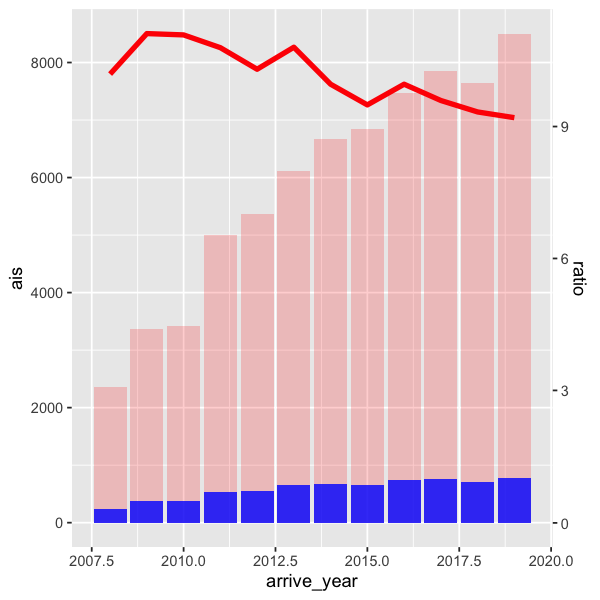

In [39]:
max_ratio <- max(t_yas_p$ais)/max(t_yas_p$r)
ggplot(t_yas_p)+
    geom_bar(aes(x=arrive_year,y=ais), fill='red', stat='identity', alpha=0.2)+
    geom_bar(aes(x=arrive_year,y=yas), fill='blue', stat='identity', alpha=0.8)+
    geom_line(aes(x=arrive_year,y=r*max_ratio), color='red', size=1.5, stat='identity', alpha=1)+
    scale_y_continuous(sec.axis=sec_axis(~./max_ratio, name='ratio'))

## UA and BA to csv

In [40]:
#write.csv(table_one, file="ua_initial.csv")
#write.csv(table_two, file="ua_extend1.csv")
#write.csv(table_three, file="ua_extend2.csv")
#write.csv(table_four, file="ua_magic.csv")
#write.csv(table_five, file="ua_oac.csv")

In [41]:
#write.csv(table_annual, file="secular_annual.csv")
#write.csv(table_epoch, file="secular_epoch.csv")

# Survival

In [42]:
yas2 <- YAS %>% subset(YAS2==1)

In [43]:
f_is <- survfit(Surv(fat_IS, IS_rec) ~ 1, data = yas2)
f_str <- survfit(Surv(fat_str, str_rec) ~ 1, data = yas2)
f_mi <- survfit(Surv(fat_mi, f_mi) ~ 1, data = yas2)
f_d <- survfit(Surv(fat_death, a_death) ~ 1, data = yas2)

In [44]:
summary(f_is)

Call: survfit(formula = Surv(fat_IS, IS_rec) ~ 1, data = yas2)

 time n.risk n.event survival  std.err lower 95% CI upper 95% CI
    0   5902       7    0.999 0.000448        0.998        1.000
    1   5894      13    0.997 0.000757        0.995        0.998
    2   5873      12    0.995 0.000956        0.993        0.996
    3   5855       6    0.994 0.001042        0.992        0.996
    4   5839       8    0.992 0.001146        0.990        0.994
    5   5820       2    0.992 0.001171        0.990        0.994
    6   5804       3    0.991 0.001207        0.989        0.994
    7   5789       7    0.990 0.001288        0.988        0.993
    8   5768       1    0.990 0.001299        0.987        0.993
    9   5751       3    0.989 0.001332        0.987        0.992
   10   5737       1    0.989 0.001343        0.987        0.992
   11   5729       2    0.989 0.001365        0.986        0.992
   12   5721       3    0.988 0.001397        0.986        0.991
   13   5716       5    0.

Warning message:
“Removed 6 row(s) containing missing values (geom_path).”
Warning message:
“Removed 5 rows containing missing values (geom_point).”
Warning message:
“Removed 6 row(s) containing missing values (geom_path).”
Warning message:
“Removed 5 rows containing missing values (geom_point).”


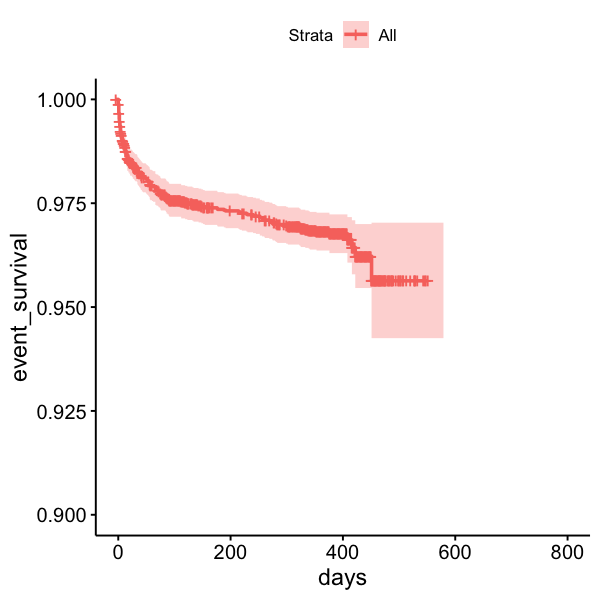

In [45]:
ggsurvplot(
    fit = f_is, 
    xlab = "days", 
    ylab = "event_survival",
    ylim = c(0.9, 1.0))

Warning message:
“Removed 6 row(s) containing missing values (geom_path).”
Warning message:
“Removed 5 rows containing missing values (geom_point).”
Warning message:
“Removed 6 row(s) containing missing values (geom_path).”
Warning message:
“Removed 5 rows containing missing values (geom_point).”


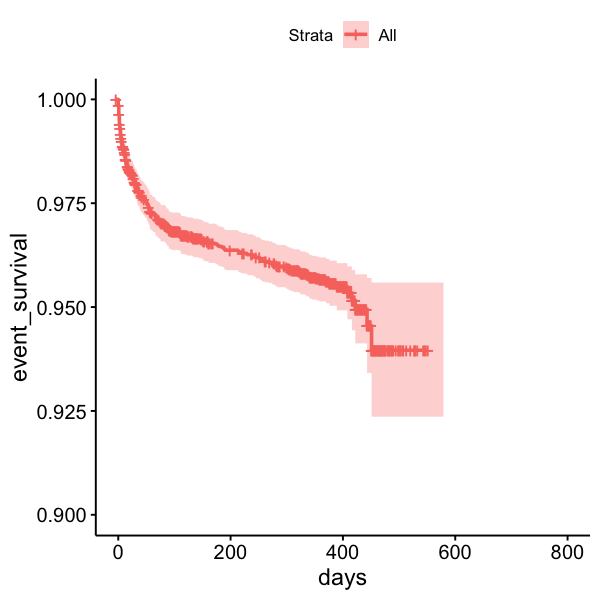

In [46]:
ggsurvplot(
    fit = f_str, 
    xlab = "days", 
    ylab = "event_survival",
    ylim = c(0.9, 1.0))

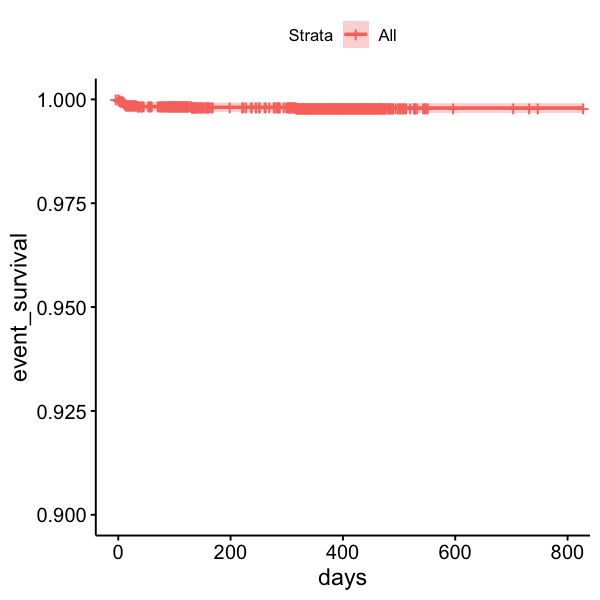

In [47]:
ggsurvplot(
    fit = f_mi, 
    xlab = "days", 
    ylab = "event_survival",
    ylim = c(0.9, 1.0))

In [48]:
summary(f_d)

Call: survfit(formula = Surv(fat_death, a_death) ~ 1, data = yas2)

 time n.risk n.event survival  std.err lower 95% CI upper 95% CI
   -4   5903       1    1.000 0.000169        0.999        1.000
    0   5902       1    1.000 0.000240        0.999        1.000
    1   5901       4    0.999 0.000415        0.998        1.000
    2   5893       3    0.998 0.000508        0.997        0.999
    3   5887       4    0.998 0.000610        0.997        0.999
    4   5877       5    0.997 0.000718        0.996        0.998
    5   5866       5    0.996 0.000812        0.995        0.998
    6   5852       1    0.996 0.000830        0.994        0.998
    7   5840       2    0.996 0.000864        0.994        0.997
    8   5825       4    0.995 0.000928        0.993        0.997
   10   5797       2    0.995 0.000959        0.993        0.996
   11   5790       2    0.994 0.000989        0.992        0.996
   12   5784       1    0.994 0.001004        0.992        0.996
   13   5782       1  

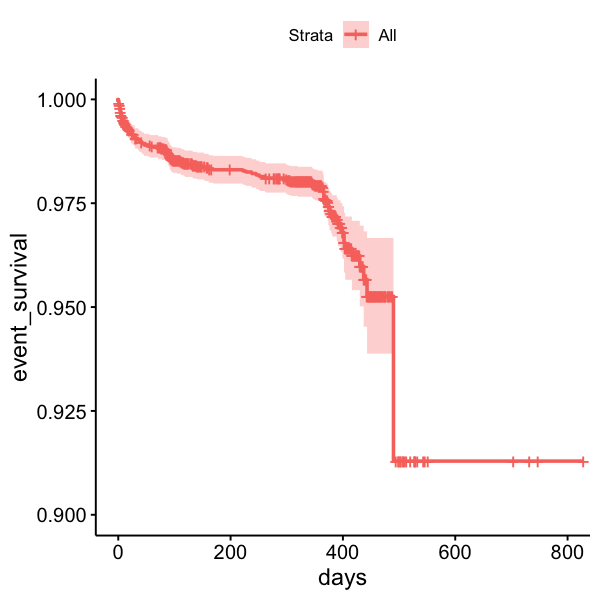

In [49]:
ggsurvplot(
    fit = f_d, 
    xlab = "days", 
    ylab = "event_survival",
    ylim = c(0.9, 1.0))

# 시간 변수 확인

In [50]:
head(yas %>% count(hod),3)
yas %>% subset(hod<0)

,hod,n
,<int>,<int>
1,-21,1
2,-7,1
3,0,59


,id,hosp,male,age,lnt,fat,arrival,delay,ini_nih,pre_mrs,premrs_e,arrive_year,arrive_date,epoch1,age_gr,FTD,LTD,LTD2,er,su,su_new,su_icu,icu,ncu,icu_n,su_n,su.icu,ht,wt,ht_r,wt_r,bmi,obesity,toast,toast_5,hx_tia,hx_str,hx_cva,hx_chd,hx_htn,hx_htn_new,hx_dm,hx_dm_new,hx_hl,hx_hl_new,smok,smok2,hx_af,hx_af_new,htn_hx,dm_hx,hl_hx,smok_c,af_hx,pfo,htx_plt,htx_coa,htx_coa_af,htx_htn,htx_dm,treat_htn,htx_statin,treat_hl,treat_dm,tx_throm,throm_oh,iv_start,ia_start,tx_iv,tx_ia,ivia_out,DTN,DTN_in,DTN_fast,DTP,DTP_in,DTP_fast,atx_plt,atx_asa,atx_clopi,atx_as_dypi,atx_cilo,atx_trif,atx_ticlo,a_plt_num,adm_plt,atx_coa,atx_wfr,atx_apix,atx_dabi,atx_riva,atx_edo,atx_doac,adm_coa,adm_coa_af,dtx_plt,dtx_asa,dtx_clopi,dtx_as_dypi,dtx_cilo,⋯,IF_dis,if.,INT_dis,Int,Hemo_dis,hemo,Migraine,mig,CVT,cvst,CADASIL,hered,Hypo_per,hypo,Iatrogenic,iat,others,cancer,etc,others2,others_w,mrs3mo,END2_kind,end2_recur,end2_d,END3_kind,end3_recur,end3_d,END1_kind,end1_recur,end1_d,ev1_kind_3m,ev1_rec1_3m,ev1_rec2_3m,ev1_cv1_3m,ev1_cv2_3m,ev1_od_3m,ev1_d_3m,ev2_kind_3m,ev2_rec1_3m,ev2_rec2_3m,ev2_cv1_3m,ev2_cv2_3m,ev2_od_3m,ev2_d_3m,ev3_kind_3m,ev3_rec1_3m,ev3_rec2_3m,ev3_cv1_3m,ev3_cv2_3m,ev3_od_3m,ev3_d_3m,ev1_kind_1y,ev1_rec1_1y,ev1_rec2_1y,ev1_cv1_1y,ev1_cv2_1y,ev1_od_1y,ev1_d_1y,ev2_kind_1y,ev2_rec1_1y,ev2_rec2_1y,ev2_cv1_1y,ev2_cv2_1y,ev2_od_1y,ev2_d_1y,ev3_kind_1y,ev3_rec1_1y,ev3_rec2_1y,ev3_cv1_1y,ev3_cv2_1y,ev3_od_1y,ev3_d_1y,last_obs_d,fat_lastobs,IS_rec,IS_rec_d,fat_IS,IS_rec_1y,fat_IS_1y,f_mi,f_mi_d,fat_mi,f_mi_1y,fat_mi_1y,str_rec,str_rec_d,fat_str,str_rec_1y,fat_str_1y,a_death,a_death_d,fat_death,death_1y,fat_death_1y,mrs3m_e,X3m_d,mrs1y_e,X1y_d,YAS2
,<chr>,<chr>,<fct>,<int>,<dttm>,<dttm>,<dttm>,<fct>,<int>,<fct>,<fct>,<int>,<date>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dttm>,<dttm>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<chr>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>,<date>,<int>,<fct>,<date>,<int>,<fct>,<int>,<fct>,<date>,<int>,<fct>,<int>,<fct>,<date>,<int>,<fct>,<int>,<fct>,<date>,<int>,<fct>,<int>,<fct>,<date>,<fct>,<date>,<fct>
6248,US-03355-3,O,1,34,2017-03-07 07:40:00,2017-03-07 07:40:00,2017-03-10 10:42:00,7,2,1,1,2017,2017-03-10,4,2,75.03333,75.03333,0,2,0,NA,NA,NA,NA,NA,0,0,171,57,171,57,19.49318,0,6,5,0,1,1,0,0,NA,0,NA,0,NA,1,3,0,NA,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,NA,NA,NA,0,0,0,NA,NA,NA,NA,NA,NA,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,NA,0,0,0,0,0,⋯,,NA,,NA,,NA,,NA,,NA,,NA,,NA,,NA,,NA,NA,,,1,NA,NA,,NA,NA,,NA,NA,,NA,NA,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,2017-08-16,162,0,2017-08-16,162,0,162,0,2017-08-16,162,0,162,0,2017-08-16,162,0,162,0,2017-08-16,162,0,162,1,2017-08-16,NA,NA,1
6256,US-03477-1,O,1,47,2017-04-11 21:00:00,2017-04-12 01:00:00,2017-04-12 11:02:00,3,22,0,0,2017,2017-04-12,4,3,10.03333,14.03333,0,2,0,NA,NA,NA,NA,NA,0,0,177,87,177,87,27.76980,1,6,5,0,0,0,0,0,NA,0,NA,0,NA,1,1,0,NA,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,NA,NA,2017-04-12 23:11:00,0,1,0,NA,NA,NA,729,729,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,NA,1,1,0,0,0,⋯,,NA,,NA,,NA,,NA,,NA,,NA,,NA,,NA,,NA,NA,,,2,NA,NA,,NA,NA,,NA,NA,,NA,NA,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,

# histogram and head/tail for continuous variables

#### 1.age

age,n
<fct>,<int>
20,183
30,610
40,2959
50,3302


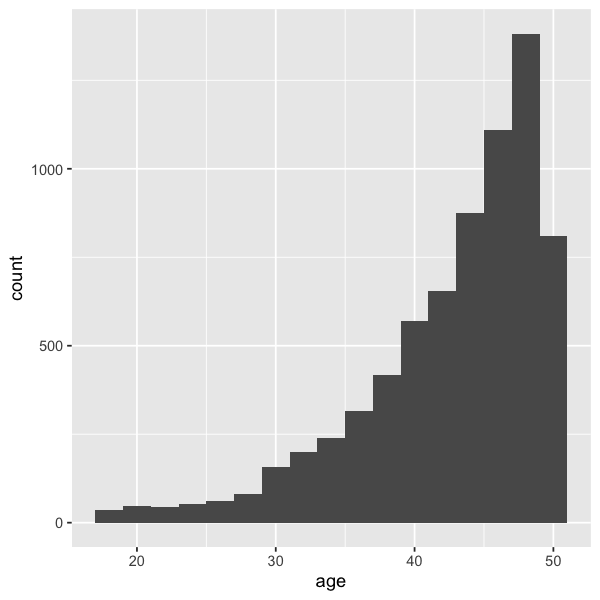

In [51]:
ggplot(yas, aes(x=age))+
    geom_histogram(binwidth=2)
as.data.frame(with(yas, table(round(age,-1)))) %>% rename(age=Var1, n=Freq)

#### lnt/fat/arrival + FTD, LTD

,lnt,n
,<dttm>,<int>
1,2008-04-01 01:00:00,1
2,2008-04-02 11:20:00,1
3,2008-04-03 12:00:00,1
4,2008-04-04 12:00:00,1
5,2008-04-04 16:00:00,1
6,2008-04-04 22:00:00,1
7,2008-04-05 00:00:00,2
8,2008-04-08 00:00:00,1
9,2008-04-08 22:00:00,1


,lnt,n
,<dttm>,<int>
6876,2019-12-28 23:00:00,1
6877,2019-12-30 19:00:00,1
6878,2019-12-31 06:00:00,1


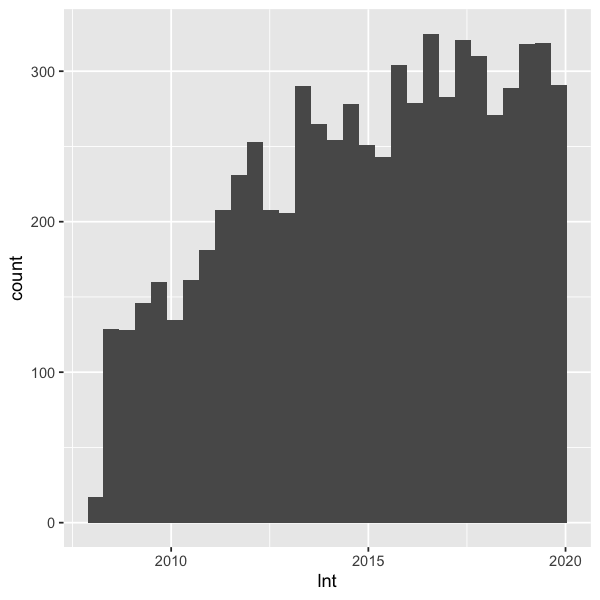

In [52]:
ggplot(yas, aes(x=lnt))+
    geom_histogram(bins=30)
head(yas%>%count(lnt),10)
tail(yas%>%count(lnt),3)

In [53]:
summary(yas$lnt)
sd(yas$lnt)

                 Min.               1st Qu.                Median 
"2008-04-01 01:00:00" "2012-05-13 08:30:00" "2015-03-19 16:30:00" 
                 Mean               3rd Qu.                  Max. 
"2014-12-06 19:43:47" "2017-08-20 18:15:00" "2019-12-31 06:00:00" 

[1] 100974954

,fat,n
,<dttm>,<int>
1,2008-04-01 08:00:00,1
2,2008-04-02 11:20:00,1
3,2008-04-03 12:00:00,1
4,2008-04-04 12:00:00,1
5,2008-04-04 16:00:00,1


,fat,n
,<dttm>,<int>
6873,2019-12-29 10:00:00,1
6874,2019-12-30 19:00:00,1
6875,2019-12-31 10:00:00,1


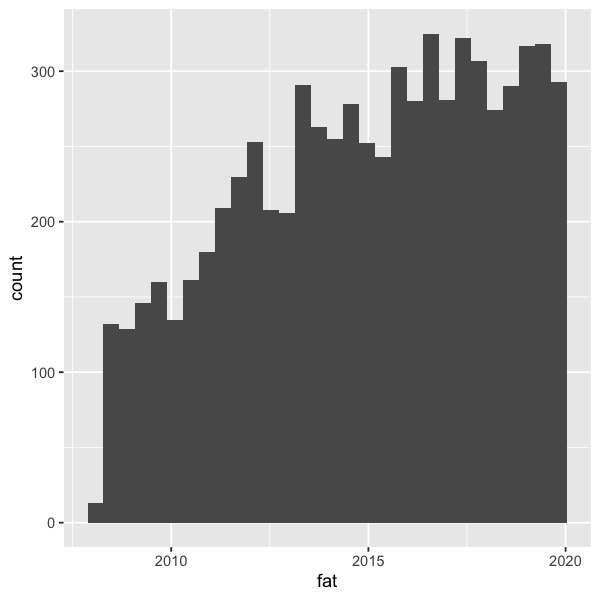

In [54]:
ggplot(yas, aes(x=fat))+
    geom_histogram(bins=30)
head(yas%>%count(fat),5)
tail(yas%>%count(fat),3)

In [55]:
summary(yas$fat)
sd(yas$fat)

                 Min.               1st Qu.                Median 
"2008-04-01 08:00:00" "2012-05-13 08:30:00" "2015-03-19 16:30:00" 
                 Mean               3rd Qu.                  Max. 
"2014-12-06 21:40:22" "2017-08-20 18:15:00" "2019-12-31 10:00:00" 

[1] 100974890

,arrival,n
,<dttm>,<int>
1,2008-04-01 09:50:00,1
2,2008-04-02 23:59:00,1
3,2008-04-05 00:07:00,1


,arrival,n
,<dttm>,<int>
7037,2019-12-30 14:50:00,1
7038,2019-12-30 19:35:00,1
7039,2019-12-31 13:05:00,1


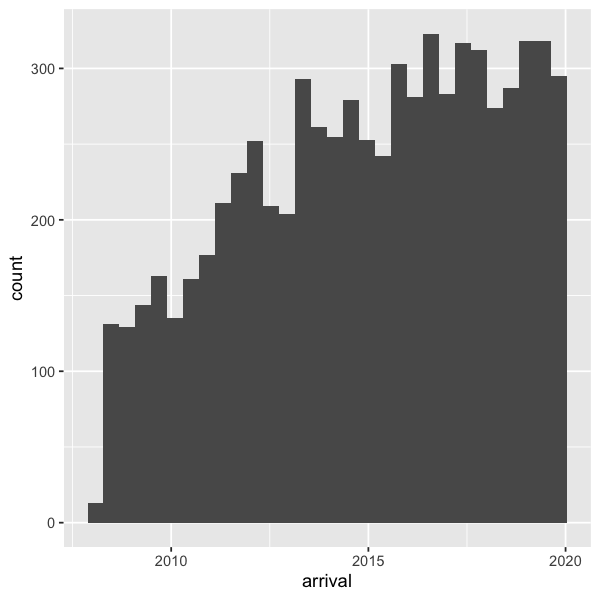

In [56]:
ggplot(yas, aes(x=arrival))+
    geom_histogram(bins=30)
head(yas%>%count(arrival),3)
tail(yas%>%count(arrival),3)

In [57]:
summary(yas$arrival)
sd(yas$arrival)

                 Min.               1st Qu.                Median 
"2008-04-01 09:50:00" "2012-05-15 10:30:30" "2015-03-20 19:38:00" 
                 Mean               3rd Qu.                  Max. 
"2014-12-07 22:20:31" "2017-08-21 16:57:30" "2019-12-31 13:05:00" 

[1] 100976036

FTD,n
<fct>,<int>
0,2834
10,1352
20,684
30,523
40,262
50,283
60,215
70,183
80,177


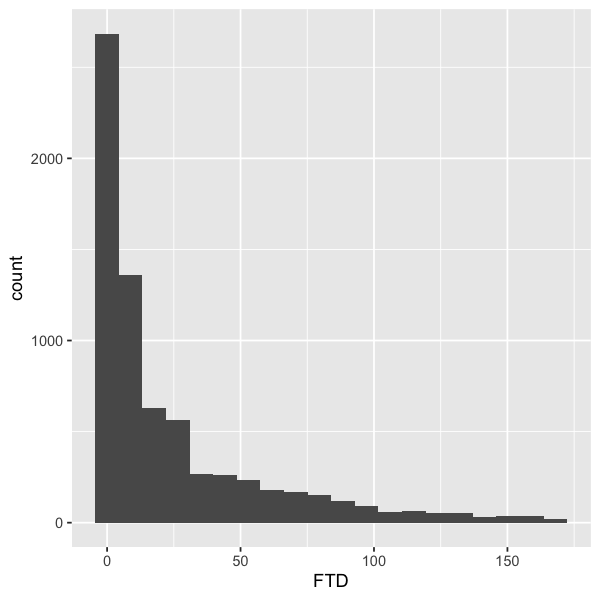

LTD,n
<fct>,<int>
0,2343
10,1583
20,841
30,472
40,369
50,272
60,228
70,199
80,151


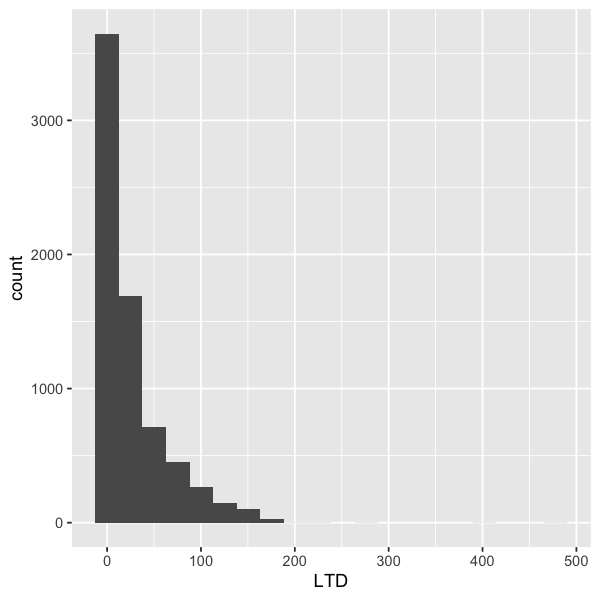

In [58]:
ggplot(yas, aes(x=FTD))+
    geom_histogram(bins=20)
as.data.frame(with(yas, table(round(FTD,-1)))) %>%rename(FTD=Var1, n=Freq)

ggplot(yas, aes(x=LTD))+
    geom_histogram(bins=20)
as.data.frame(with(yas, table(round(LTD,-1)))) %>%rename(LTD=Var1, n=Freq)

#### ht/wt/bmi

Warning message:
“Removed 120 rows containing non-finite values (stat_bin).”


ht_r,n
<fct>,<int>
140,21
150,290
160,2080
170,2936
180,1554
190,51
200,2


Warning message:
“Removed 69 rows containing non-finite values (stat_bin).”


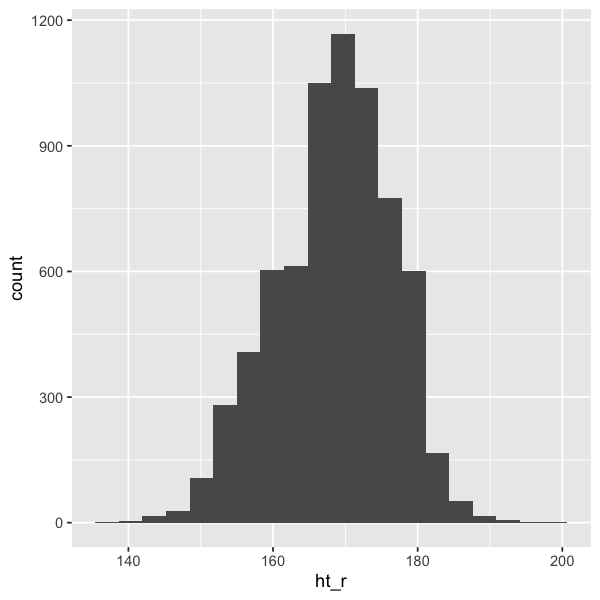

wt_r,n
<fct>,<int>
30,5
40,99
50,645
60,1739
70,1844
80,1733
90,524
100,290
110,70


Warning message:
“Removed 129 rows containing non-finite values (stat_bin).”


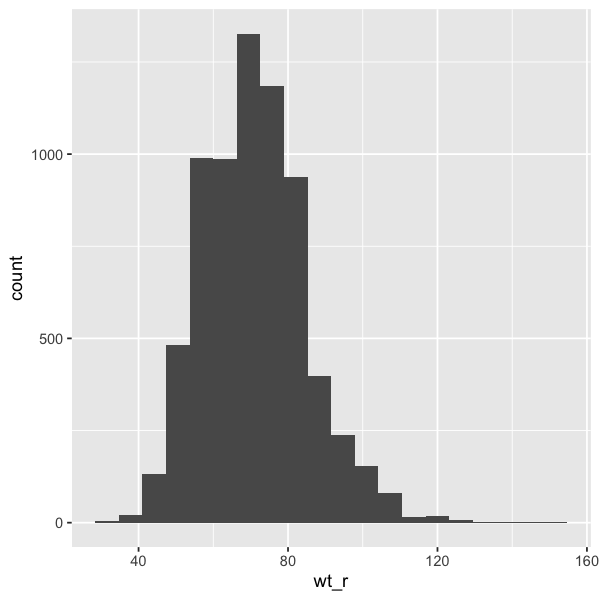

bmi,n
<fct>,<int>
10,9
20,3756
30,3052
40,104
50,4


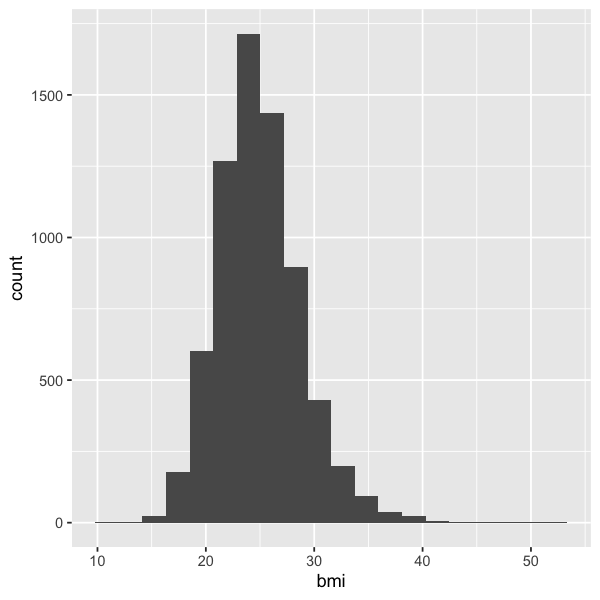

In [59]:
ggplot(yas, aes(x=ht_r))+
    geom_histogram(bins=20)
as.data.frame(with(yas, table(round(ht_r,-1)))) %>%rename(ht_r=Var1, n=Freq)

ggplot(yas, aes(x=wt_r))+
    geom_histogram(bins=20)
as.data.frame(with(yas, table(round(wt_r,-1)))) %>%rename(wt_r=Var1, n=Freq)

ggplot(yas, aes(x=bmi))+
    geom_histogram(bins=20)
as.data.frame(with(yas, table(round(bmi,-1)))) %>%rename(bmi=Var1, n=Freq)

#### iv_start, ia_start, DTN, DTP

Warning message:
“Removed 6130 rows containing non-finite values (stat_bin).”


,iv_start,n
,<dttm>,<int>
1,2008-04-12 06:00:00,1
2,2008-04-18 21:40:00,1
3,2008-06-04 10:50:00,1


,iv_start,n
,<dttm>,<int>
922,2019-12-24 18:07:00,1
923,2019-12-24 18:20:00,1
924,NA,6130


Warning message:
“Removed 6574 rows containing non-finite values (stat_bin).”


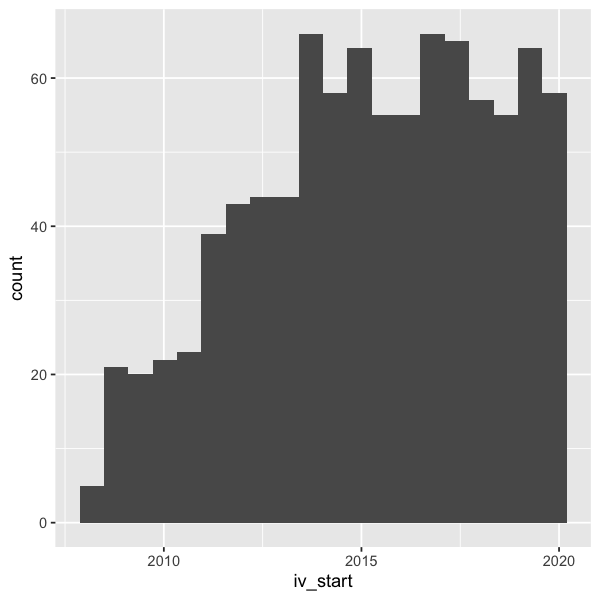

,ia_start,n
,<dttm>,<int>
1,2009-02-04 16:15:00,1
2,2009-04-08 14:50:00,1
3,2009-07-26 19:02:00,1


,ia_start,n
,<dttm>,<int>
479,2019-12-24 01:10:00,1
480,2019-12-28 15:50:00,1
481,NA,6574


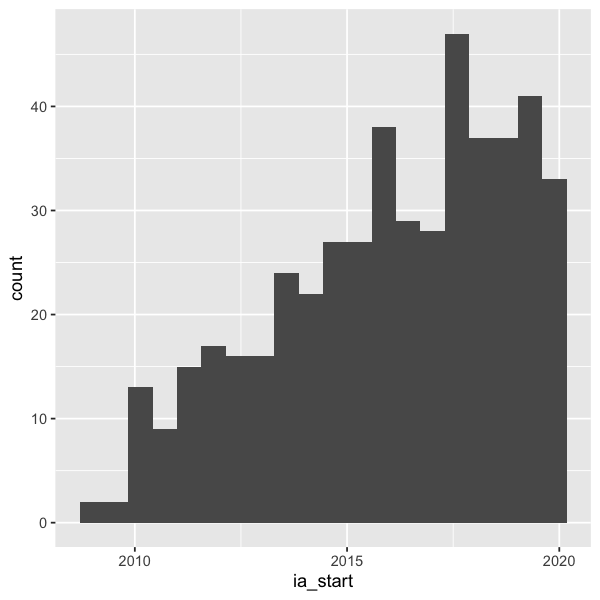

In [60]:
ggplot(yas, aes(x=iv_start))+
    geom_histogram(bins=20)
head(yas%>%count(iv_start),3)
tail(yas%>%count(iv_start),3)

ggplot(yas, aes(x=ia_start))+
    geom_histogram(bins=20)
head(yas%>%count(ia_start),3)
tail(yas%>%count(ia_start),3)

Warning message:
“Removed 6130 rows containing non-finite values (stat_bin).”


DTN,n
<fct>,<int>
-8500,1
-6300,1
-5200,1
-3400,1
-3100,1
-2900,1
-2800,1
-2500,1
-1800,1


Warning message:
“Removed 6574 rows containing non-finite values (stat_bin).”


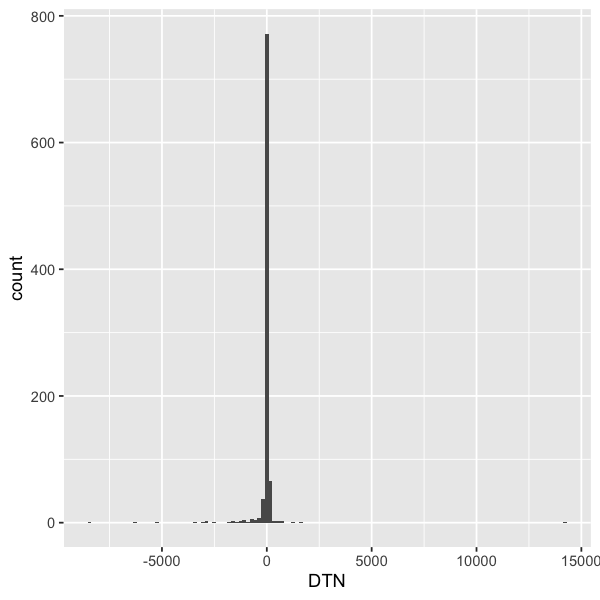

DTP,n
<fct>,<int>
-5000,1
-3300,1
-1800,1
-1000,1
-700,1
-600,1
-300,1
0,23
100,331


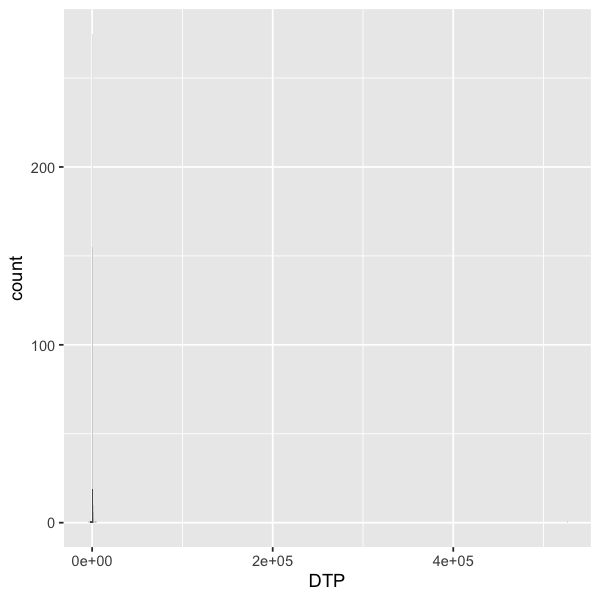

In [61]:
ggplot(yas, aes(x=DTN))+
    geom_histogram(binwidth=180)
as.data.frame(with(yas, table(round(DTN,-2)))) %>%rename(DTN=Var1, n=Freq)

ggplot(yas, aes(x=DTP))+
    geom_histogram(binwidth=180)
as.data.frame(with(yas, table(round(DTP,-2)))) %>%rename(DTP=Var1, n=Freq)

Warning message:
“Removed 6242 rows containing non-finite values (stat_bin).”


DTN_in,n
<fct>,<int>
-500,1
-100,1
0,562
100,227
200,13
300,2
400,1
500,1
600,1


Warning message:
“Removed 6618 rows containing non-finite values (stat_bin).”


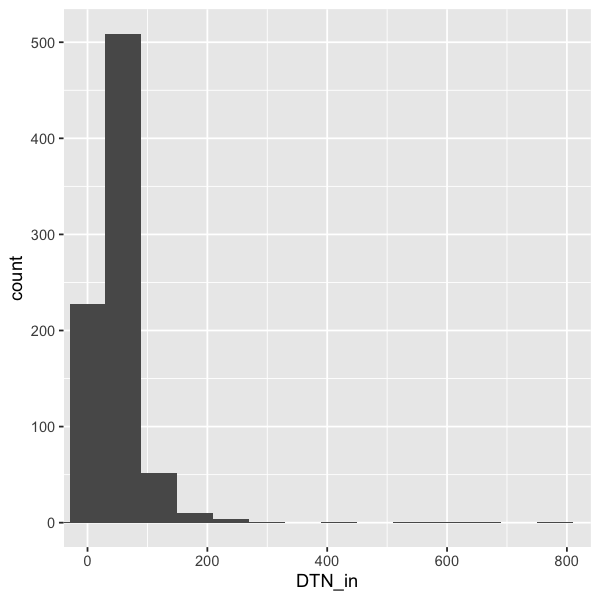

DTP_in,n
<fct>,<int>
-600,1
-300,1
0,10
100,310
200,71
300,10
400,10
500,6
600,4


Warning message:
“Removed 6242 rows containing non-finite values (stat_bin).”


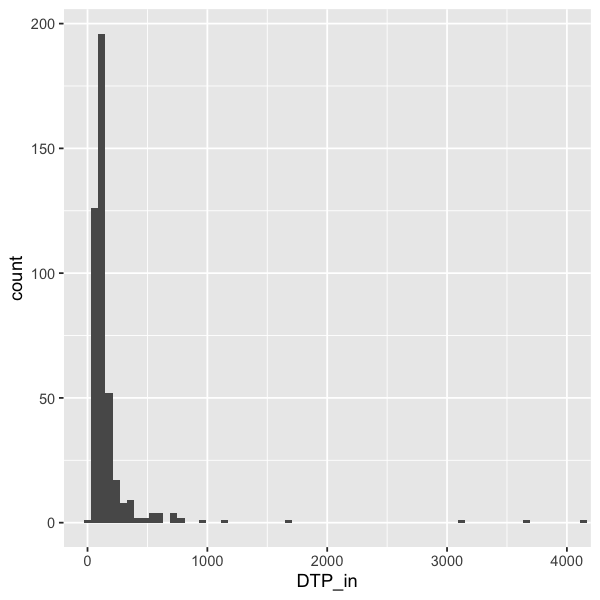

Warning message:
“Removed 6618 rows containing non-finite values (stat_bin).”


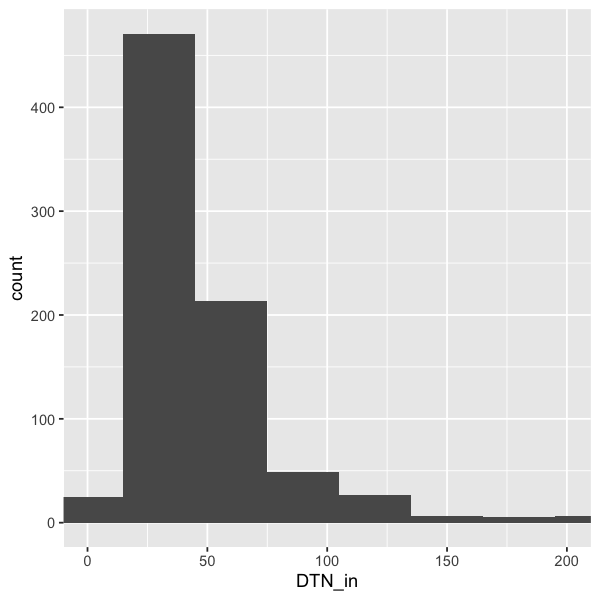

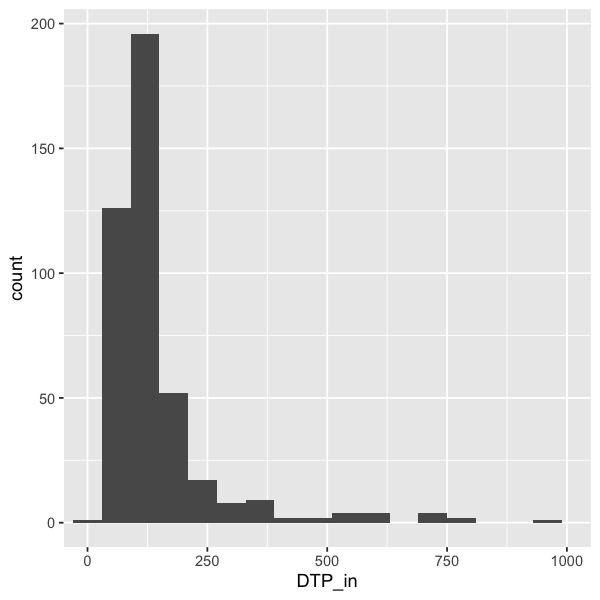

In [62]:
ggplot(yas, aes(x=DTN_in))+
    geom_histogram(binwidth=60)+coord_cartesian(xlim=c(0,800))
as.data.frame(with(yas, table(round(DTN_in,-2)))) %>%rename(DTN_in=Var1, n=Freq)

ggplot(yas, aes(x=DTP_in))+
    geom_histogram(binwidth=60)+coord_cartesian(xlim=c(0,4000))
as.data.frame(with(yas, table(round(DTP_in,-2)))) %>%rename(DTP_in=Var1, n=Freq)

ggplot(yas, aes(x=DTN_in))+
    geom_histogram(binwidth=30)+coord_cartesian(xlim=c(0,200))
ggplot(yas, aes(x=DTP_in))+
    geom_histogram(binwidth=60)+coord_cartesian(xlim=c(0,1000))

#### lab data/BP

Warning message:
“Removed 213 rows containing non-finite values (stat_bin).”


tg_e,n
<fct>,<int>
0,393
100,4021
200,1631
300,495
400,160
500,54
600,33
700,17
800,15


Warning message:
“Removed 251 rows containing non-finite values (stat_bin).”


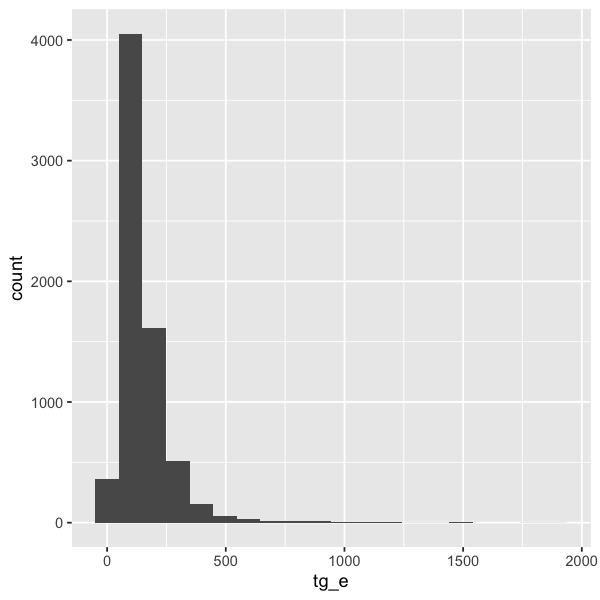

hdl_e,n
<fct>,<int>
10,9
20,120
30,1139
40,2526
50,1557
60,902
70,329
80,149
90,46


Warning message:
“Removed 251 rows containing non-finite values (stat_bin).”


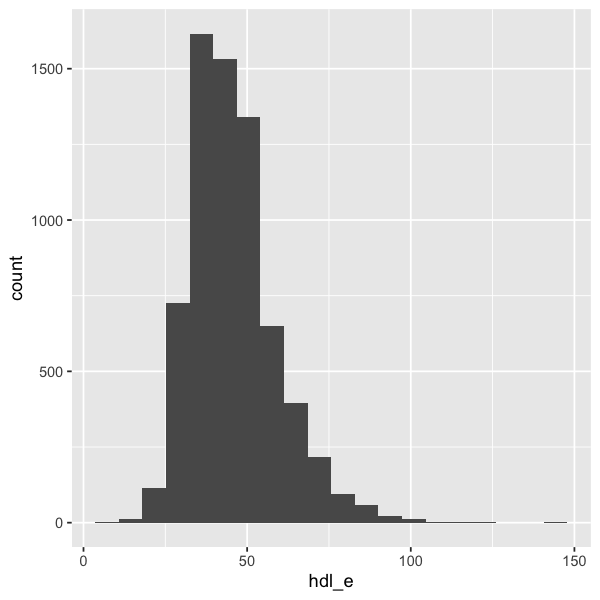

ldl_e,n
<fct>,<int>
10,8
20,10
30,29
40,84
50,154
60,298
70,360
80,558
90,561


Warning message:
“Removed 706 rows containing non-finite values (stat_bin).”


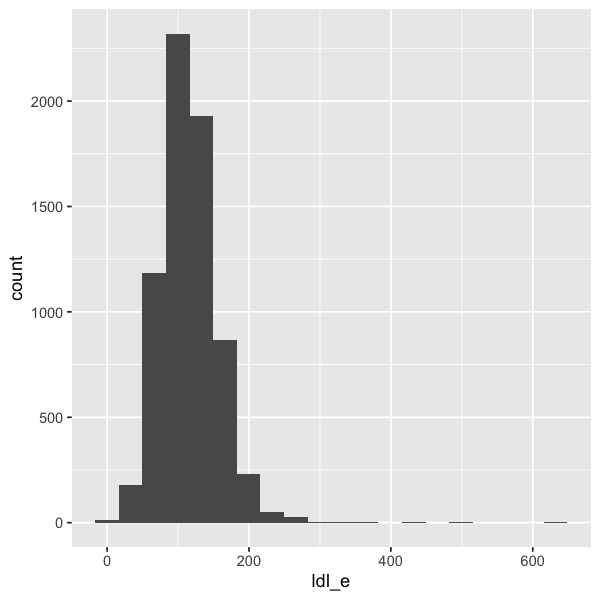

ha1c_e,n
<fct>,<int>
0,1
4,50
5,2292
6,2673
7,374
8,286
9,188
10,205
11,138


Warning message:
“Removed 80 rows containing non-finite values (stat_bin).”


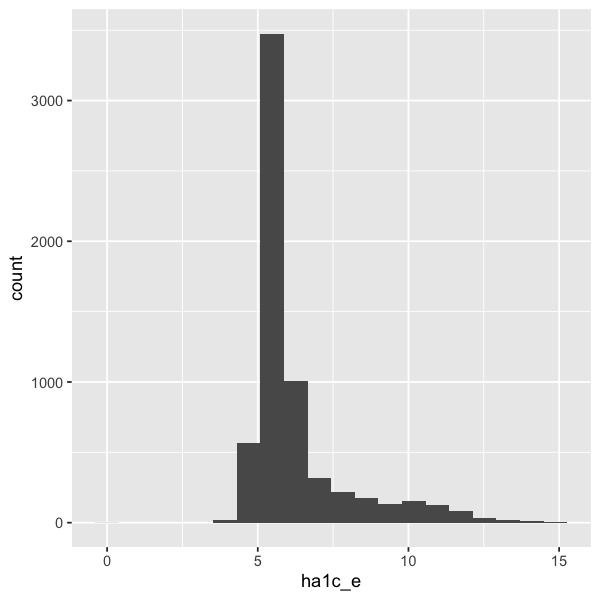

glucose,n
<fct>,<int>
0,7
100,5383
200,1180
300,291
400,74
500,32
600,3
700,3
800,1


Warning message:
“Removed 27 rows containing non-finite values (stat_bin).”


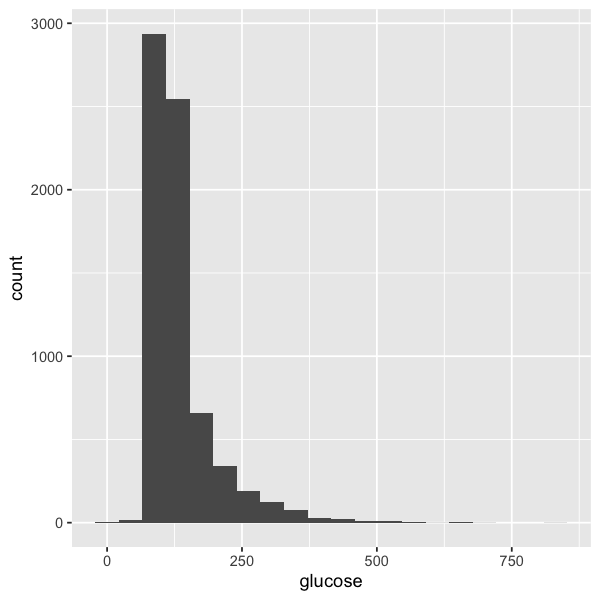

sbp_e,n
<fct>,<int>
50,1
70,4
80,3
90,35
100,251
110,494
120,891
130,924
140,1130


Warning message:
“Removed 27 rows containing non-finite values (stat_bin).”


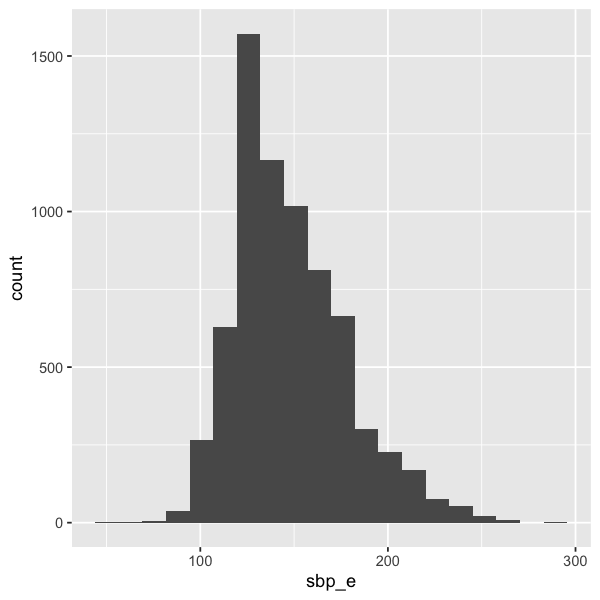

dbp_e,n
<fct>,<int>
30,3
40,16
50,41
60,424
70,960
80,1778
90,1338
100,1389
110,470


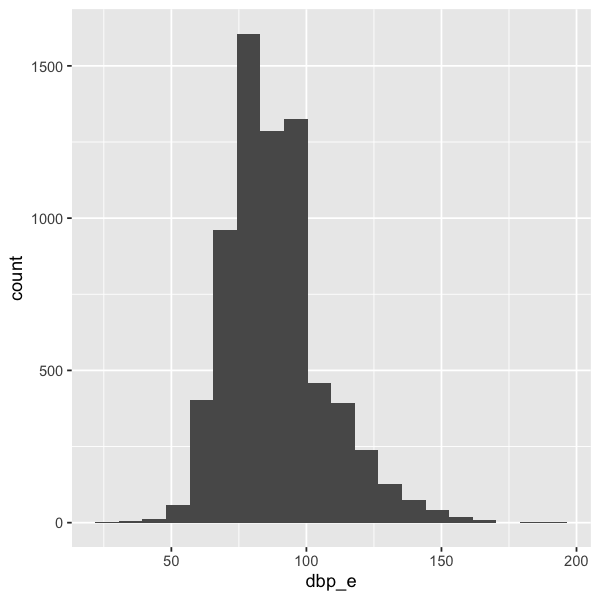

In [63]:
ggplot(yas, aes(x=tg_e))+
    geom_histogram(bins=20)
as.data.frame(with(yas, table(round(tg_e,-2)))) %>%rename(tg_e=Var1, n=Freq)

ggplot(yas, aes(x=hdl_e))+
    geom_histogram(bins=20)
as.data.frame(with(yas, table(round(hdl_e,-1)))) %>%rename(hdl_e=Var1, n=Freq)

ggplot(yas, aes(x=ldl_e))+
    geom_histogram(bins=20)
as.data.frame(with(yas, table(round(ldl_e,-1)))) %>%rename(ldl_e=Var1, n=Freq)

ggplot(yas, aes(x=ha1c_e))+
    geom_histogram(bins=20)
as.data.frame(with(yas, table(round(ha1c_e,0)))) %>%rename(ha1c_e=Var1, n=Freq)

ggplot(yas, aes(x=glucose))+
    geom_histogram(bins=20)
as.data.frame(with(yas, table(round(glucose,-2)))) %>%rename(glucose=Var1, n=Freq)

ggplot(yas, aes(x=sbp_e))+
    geom_histogram(bins=20)
as.data.frame(with(yas, table(round(sbp_e,-1)))) %>%rename(sbp_e=Var1, n=Freq)

ggplot(yas, aes(x=dbp_e))+
    geom_histogram(bins=20)
as.data.frame(with(yas, table(round(dbp_e,-1)))) %>%rename(dbp_e=Var1, n=Freq)

#### dis_d / hod

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”


,dis_d,n
,<date>,<int>
1,2008-04-09,1
2,2008-04-10,1
3,2008-04-11,2


,dis_d,n
,<date>,<int>
3133,2020-01-29,1
3134,2020-02-11,1
3135,NA,2


Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”


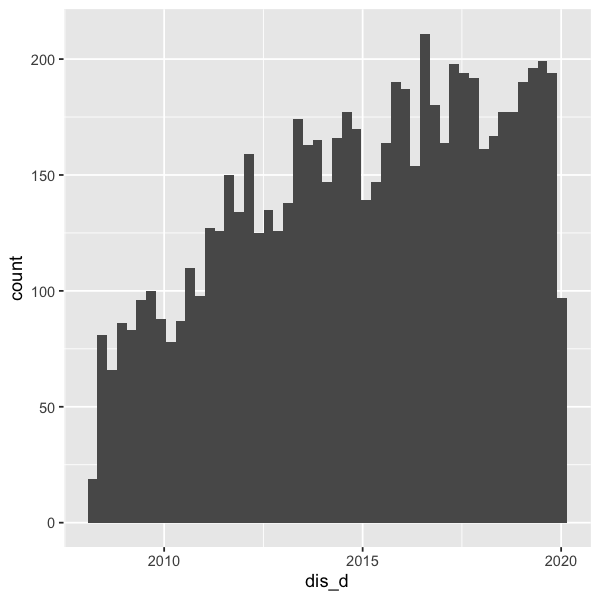

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”


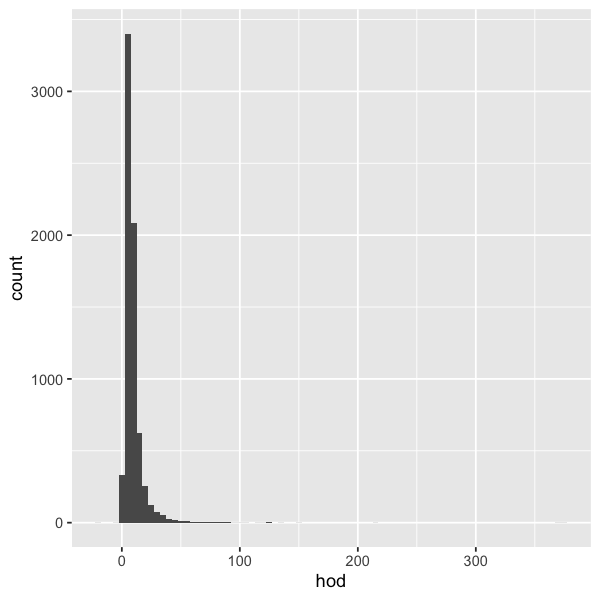

hod,n
<fct>,<int>
-20,1
-10,1
0,1964
10,4155
20,666
30,133
40,70
50,20
60,14


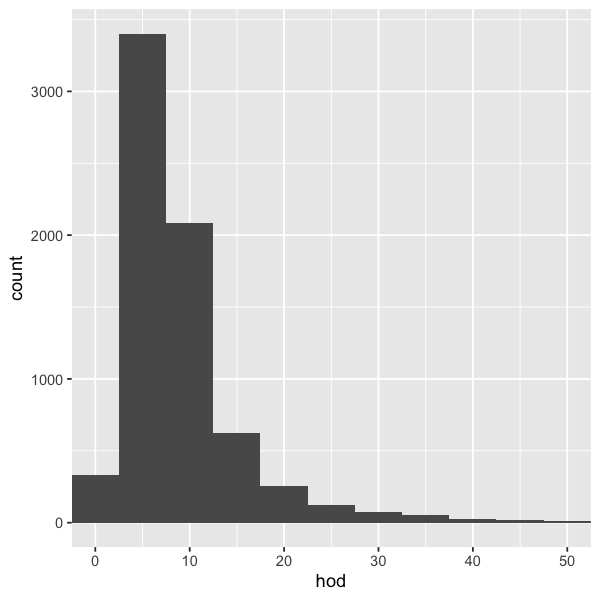

In [64]:
ggplot(yas, aes(x=dis_d))+
    geom_histogram(binwidth=90)
head(yas%>%count(dis_d),3)
tail(yas%>%count(dis_d),3)

ggplot(yas, aes(x=hod))+
    geom_histogram(binwidth=5)
ggplot(yas, aes(x=hod))+
    geom_histogram(binwidth=5)+coord_cartesian(xlim=c(0,50))
as.data.frame(with(yas, table(round(hod,-1)))) %>%rename(hod=Var1, n=Freq)

#### fat_lastobs, fat_str, fat_death

Warning message:
“Removed 1151 rows containing non-finite values (stat_bin).”


fat_lastobs,n
<fct>,<int>
0,51
10,83
20,24
30,9
40,8
50,3
60,3
70,4
80,17


Warning message:
“Removed 1149 rows containing non-finite values (stat_bin).”


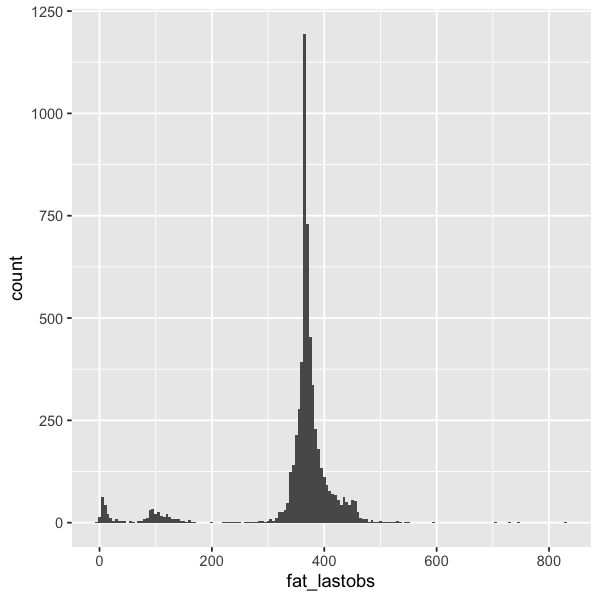

fat_str,n
<fct>,<int>
0,107
10,112
20,43
30,27
40,19
50,15
60,13
70,13
80,23


Warning message:
“Removed 1151 rows containing non-finite values (stat_bin).”


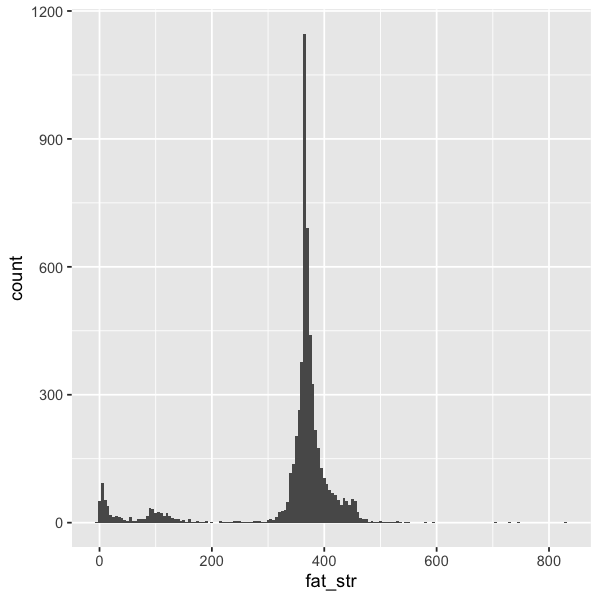

fat_death,n
<fct>,<int>
0,51
10,83
20,24
30,9
40,8
50,3
60,3
70,5
80,20


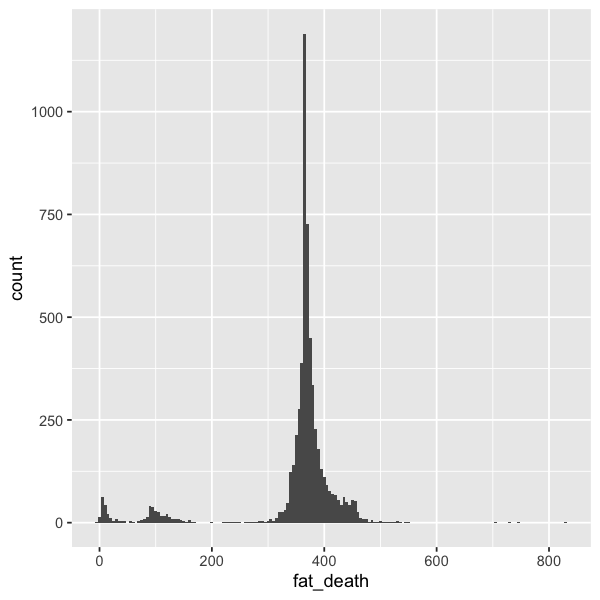

In [65]:
ggplot(yas, aes(x=fat_lastobs))+
    geom_histogram(binwidth=5)
as.data.frame(with(yas, table(round(fat_lastobs,-1)))) %>%rename(fat_lastobs=Var1, n=Freq)

ggplot(yas, aes(x=fat_str))+
    geom_histogram(binwidth=5)
as.data.frame(with(yas, table(round(fat_str,-1)))) %>%rename(fat_str=Var1, n=Freq)

ggplot(yas, aes(x=fat_death))+
    geom_histogram(binwidth=5)
as.data.frame(with(yas, table(round(fat_death,-1)))) %>%rename(fat_death=Var1, n=Freq)

In [66]:
# stroke, death 발생에 대해서만 count하려면
yas_temp <- yas
yas_temp <- yas_temp %>% mutate(fat_str_2 = ifelse(str_rec==1, fat_str,NA),
                               fat_death_2 = ifelse(a_death==1, fat_death,NA))

Warning message:
“Removed 6796 rows containing non-finite values (stat_bin).”


fat_str_2,n
<fct>,<int>
0,56
10,31
20,21
30,19
40,13
50,12
60,10
70,9
80,6


Warning message:
“Removed 6903 rows containing non-finite values (stat_bin).”


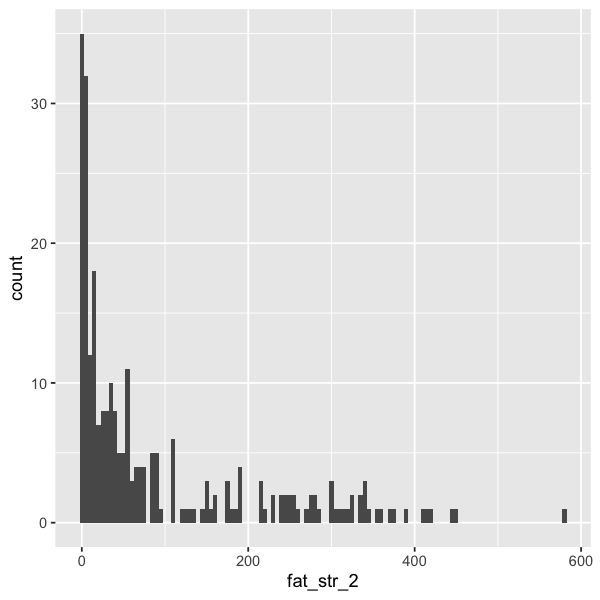

fat_death_2,n
<fct>,<int>
0,23
10,15
20,12
30,5
40,7
50,3
60,1
70,2
80,2


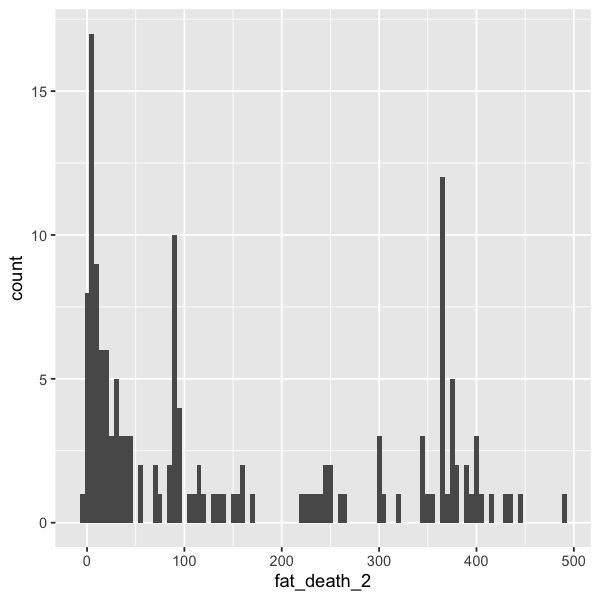

In [67]:
ggplot(yas_temp, aes(x=fat_str_2))+
    geom_histogram(binwidth=5)
as.data.frame(with(yas_temp, table(round(fat_str_2,-1)))) %>%rename(fat_str_2=Var1, n=Freq)

ggplot(yas_temp, aes(x=fat_death_2))+
    geom_histogram(binwidth=5)
as.data.frame(with(yas_temp, table(round(fat_death_2,-1)))) %>%rename(fat_death_2=Var1, n=Freq)